## COP and COG estimation by derivative method
Trying to estimate COP and COG were used linear function wich didn't give the results expected, therefore we tried to make different approaches and one of them is the next function:
COP= COG-(4/g*3*d²derivadasegundaTeta)

## Python libraries

First, let's import the necessary Python libraries and configure the environment:

In [2]:
import numpy as np
#from scipy.signal import butter, filtfilt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
#import seaborn as sns
#sns.set_context("notebook", font_scale=1.3,
#                rc={'lines.linewidth': 1.5, 'lines.markersize': 14, 'axes.titlesize': 'x-large'})
#matplotlib.rc('legend', numpoints=1, fontsize=14)
#import glob
import sys, os
sys.path.insert(1, r'./Functions')
# IPython widgets:
from IPython.display import display
import ipywidgets
from ipywidgets import FloatProgress, interactive

Versions of the Python libraries used:

In [3]:
#!pip install version_information
%load_ext version_information
%version_information numpy, scipy, pandas, matplotlib, seaborn

Software versions
Python 3.8.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.22.0
OS Windows 10 10.0.22000 SP0
numpy 1.20.1
scipy 1.6.2
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1
Mon Mar 28 14:06:16 2022 Hora oficial do Brasil

## Meta data

The file `PDSinfo.txt` contains meta data about the subjects and the experimental trials. The file has a header plus 588 rows per 29 columns (there are 12 rows for each of the 49 subjects).   
Let's use the power of the [pandas](http://pandas.pydata.org/) library to load and explore the meta data:

In [4]:
# GitHub URL:
#path2 = 'C:\Users\ferna\Downloads\IC- dados\Dados'
# local directory:
path2 = r'C:\\Users\\ferna\\Downloads\\IC- dados\\Dados'
fname = os.path.join(path2, 'PDSinfo.txt')
PDSinfo = pd.read_csv(fname, sep='\t', header=0, index_col=None, engine='c', encoding='utf-8')
print(fname)
print("Information of %s subjects loaded (%s rows, %s columns)."
      %(len(pd.unique(PDSinfo.Subject)), PDSinfo.shape[0], PDSinfo.shape[1]))

C:\\Users\\ferna\\Downloads\\IC- dados\\Dados\PDSinfo.txt
Information of 49 subjects loaded (588 rows, 29 columns).


In [5]:
a=PDSinfo[PDSinfo['Subject']==44].index.tolist()
e=PDSinfo[PDSinfo['Subject']==44].index.tolist()[2]
print(a)
print(e)

[516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527]
518


Here are the first 12 rows and first 10 columns of meta data:

## COP and COG displacements

## For Every Subject

## Corrrelation 

In [6]:

import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)

# Correlation between COPX and Angle x

# Correlation between COPX and First Derivative x

# Correlation between COPX and Second Derivative x

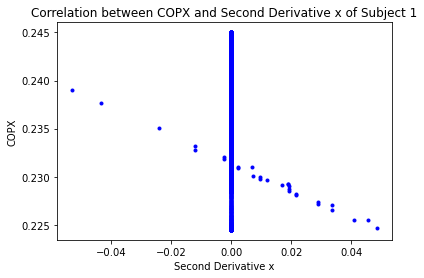

[[ 1.         -0.09580624]
 [-0.09580624  1.        ]]


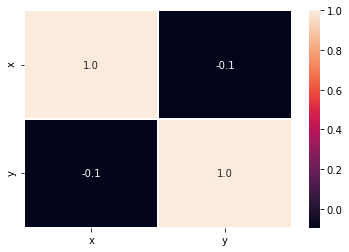

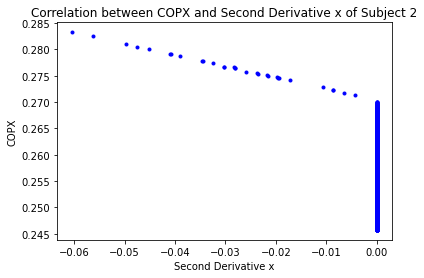

[[ 1.         -0.22668354]
 [-0.22668354  1.        ]]


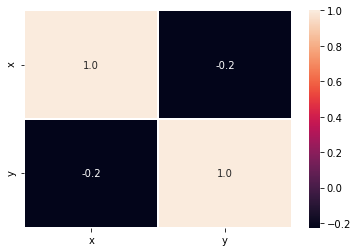

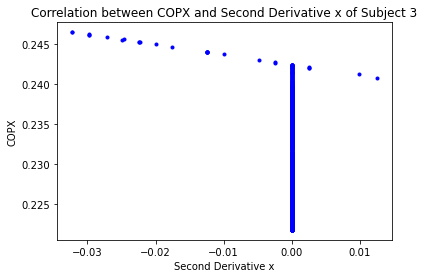

[[ 1.         -0.16194931]
 [-0.16194931  1.        ]]


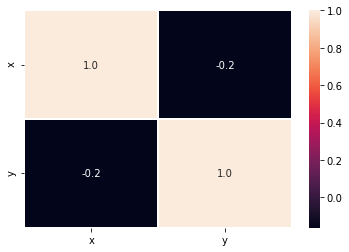

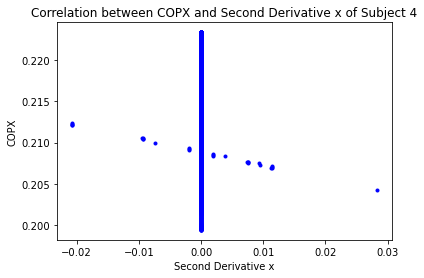

[[ 1.         -0.02182057]
 [-0.02182057  1.        ]]


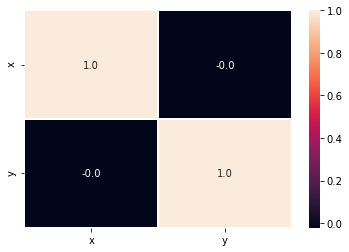

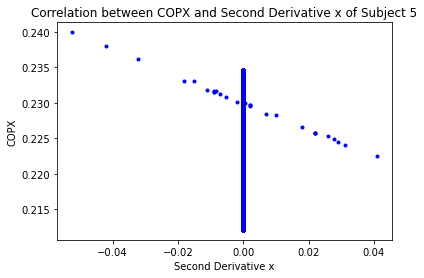

[[ 1.        -0.0473313]
 [-0.0473313  1.       ]]


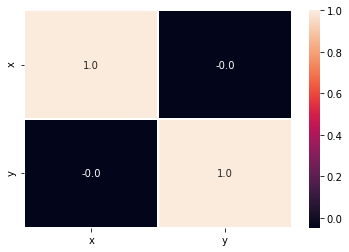

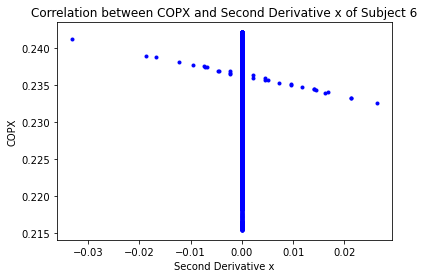

[[ 1.         -0.00951637]
 [-0.00951637  1.        ]]


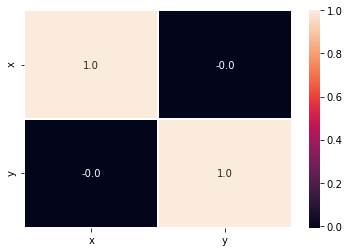

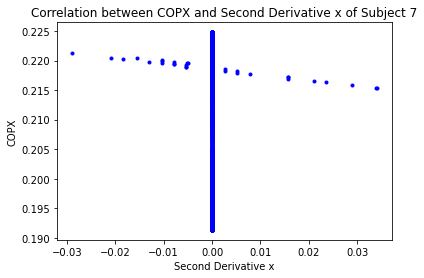

[[ 1.         -0.00587161]
 [-0.00587161  1.        ]]


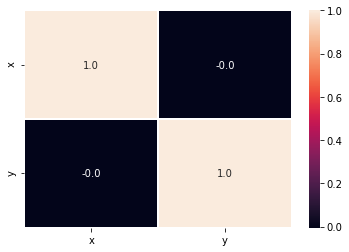

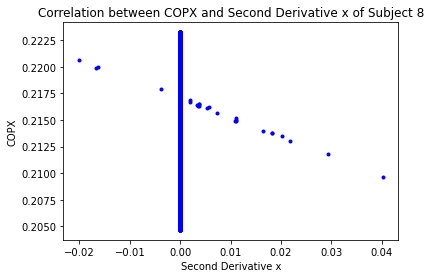

[[ 1.         -0.03255949]
 [-0.03255949  1.        ]]


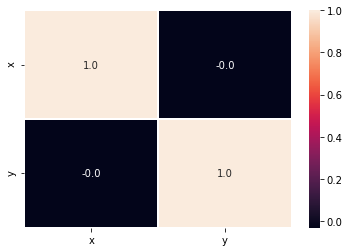

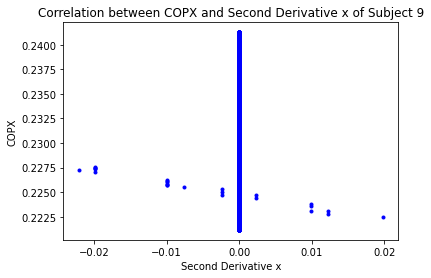

[[1.         0.00657613]
 [0.00657613 1.        ]]


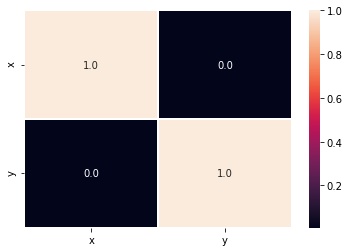

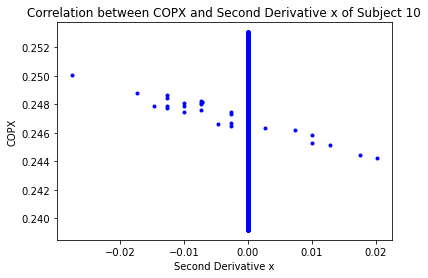

[[ 1.         -0.03617527]
 [-0.03617527  1.        ]]


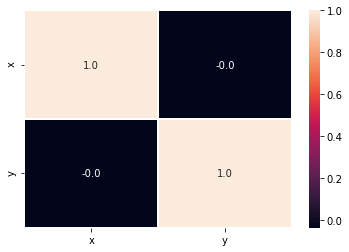

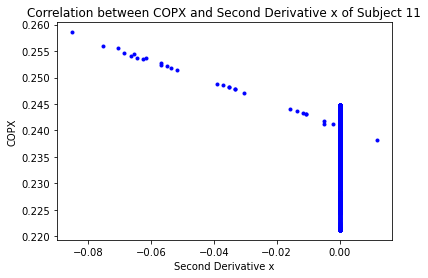

[[ 1.         -0.20329582]
 [-0.20329582  1.        ]]


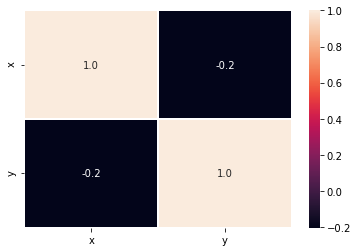

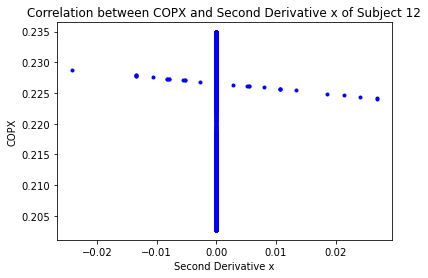

[[ 1.         -0.00771344]
 [-0.00771344  1.        ]]


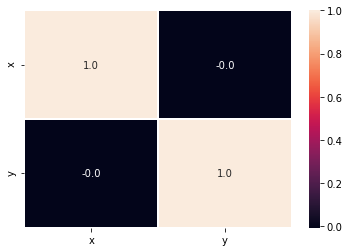

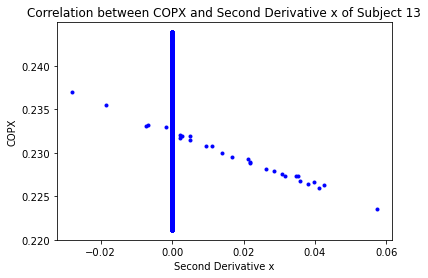

[[ 1.         -0.04125995]
 [-0.04125995  1.        ]]


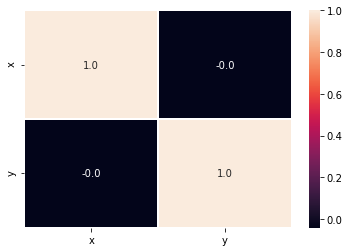

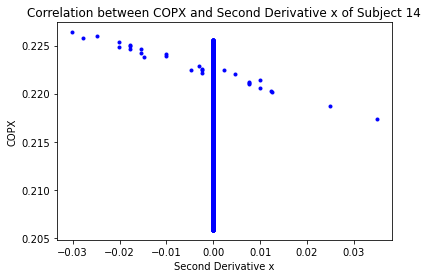

[[ 1.         -0.06172253]
 [-0.06172253  1.        ]]


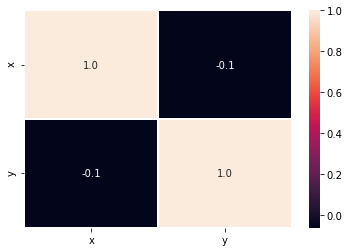

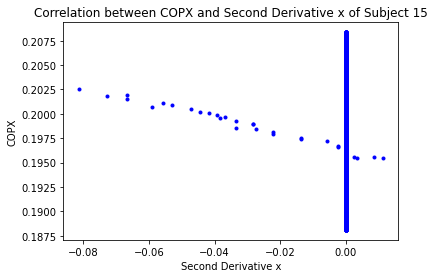

[[ 1.         -0.04928773]
 [-0.04928773  1.        ]]


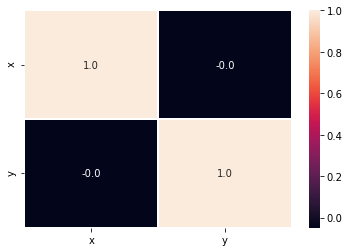

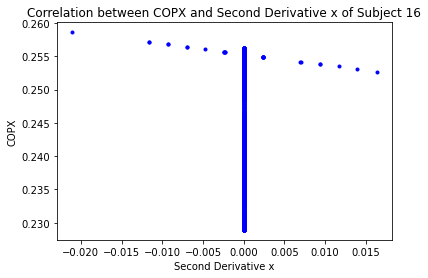

[[ 1.         -0.01525455]
 [-0.01525455  1.        ]]


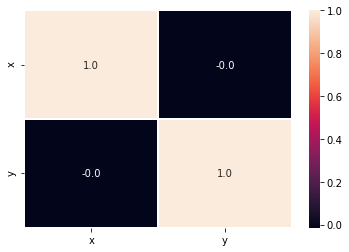

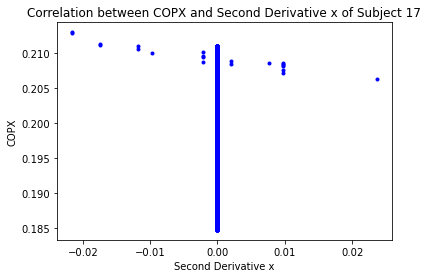

[[ 1.        -0.0339473]
 [-0.0339473  1.       ]]


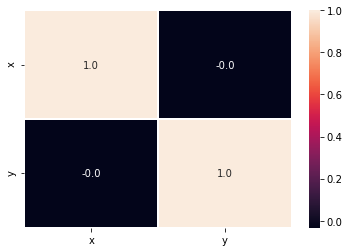

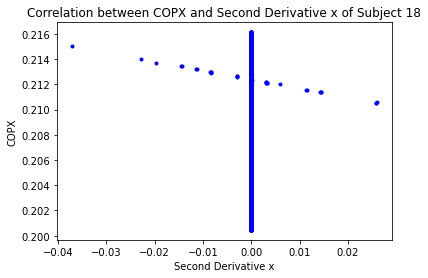

[[ 1.         -0.02406467]
 [-0.02406467  1.        ]]


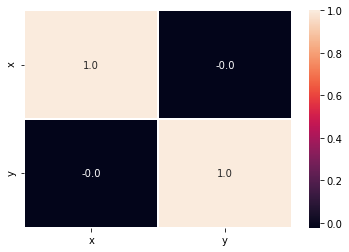

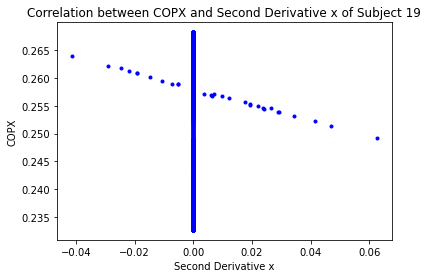

[[ 1.         -0.00915888]
 [-0.00915888  1.        ]]


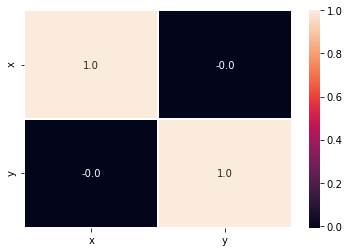

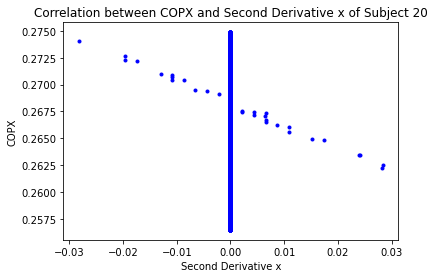

[[ 1.         -0.04466914]
 [-0.04466914  1.        ]]


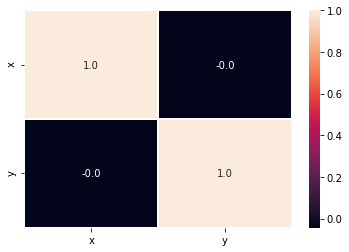

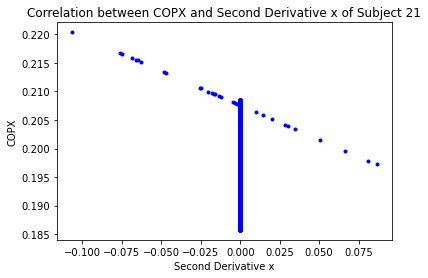

[[ 1.         -0.13111697]
 [-0.13111697  1.        ]]


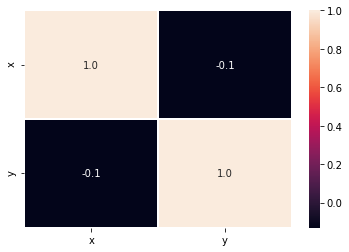

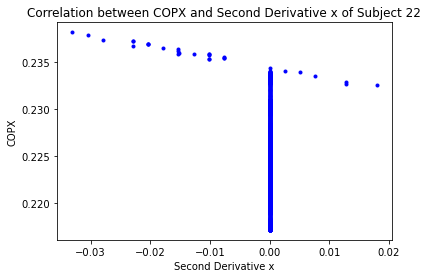

[[ 1.         -0.16658107]
 [-0.16658107  1.        ]]


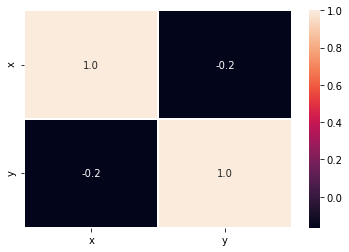

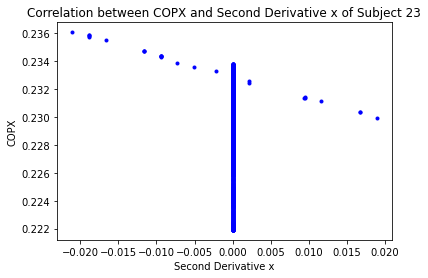

[[ 1.         -0.08680855]
 [-0.08680855  1.        ]]


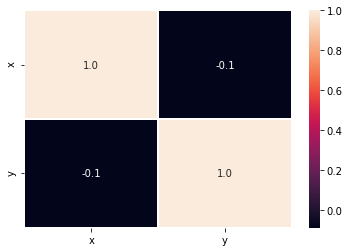

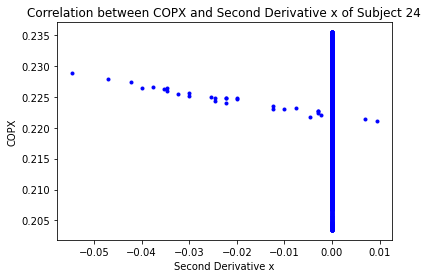

[[ 1.         -0.05352237]
 [-0.05352237  1.        ]]


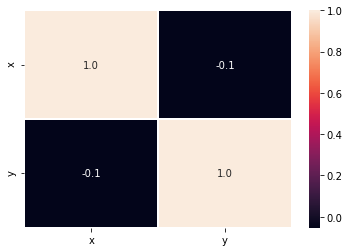

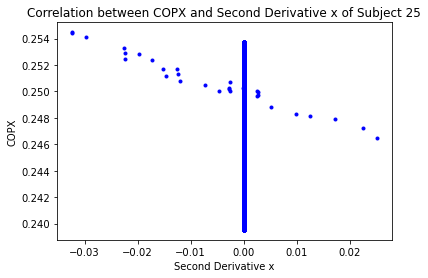

[[ 1.         -0.07317815]
 [-0.07317815  1.        ]]


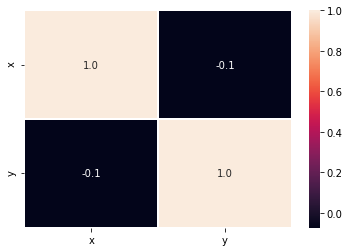

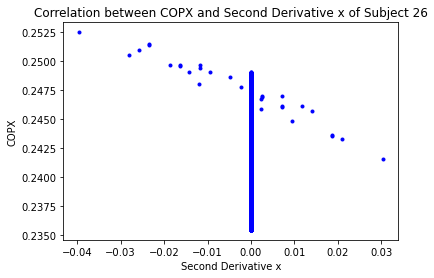

[[ 1.         -0.08608609]
 [-0.08608609  1.        ]]


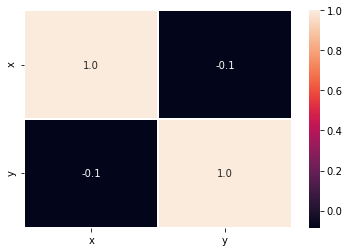

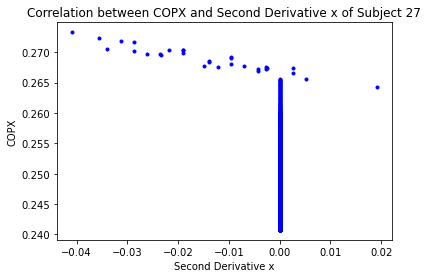

[[ 1.         -0.26231142]
 [-0.26231142  1.        ]]


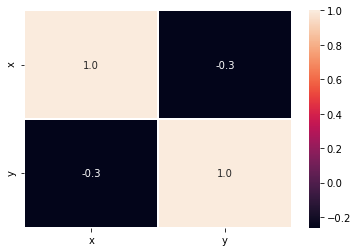

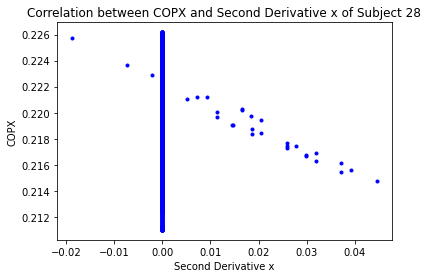

[[ 1.         -0.00749063]
 [-0.00749063  1.        ]]


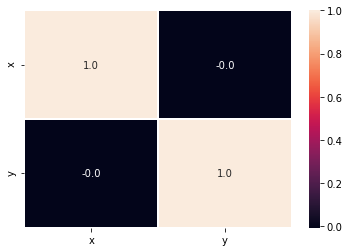

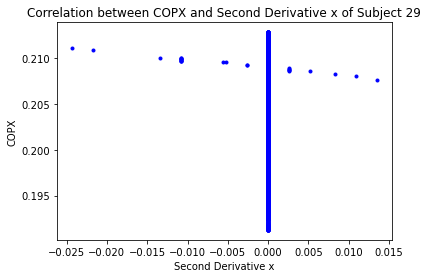

[[ 1.         -0.05291048]
 [-0.05291048  1.        ]]


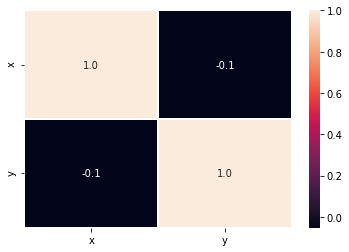

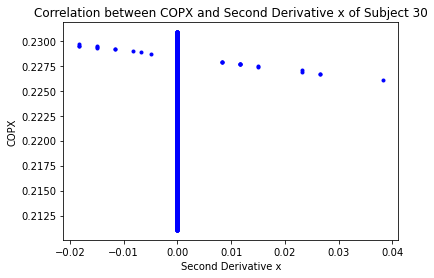

[[1.         0.00813167]
 [0.00813167 1.        ]]


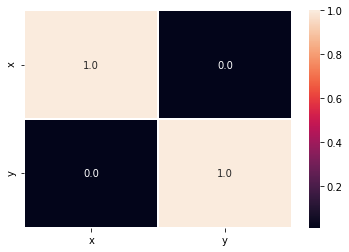

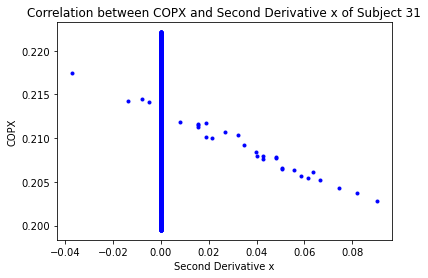

[[ 1.         -0.05001402]
 [-0.05001402  1.        ]]


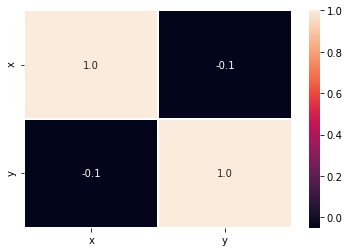

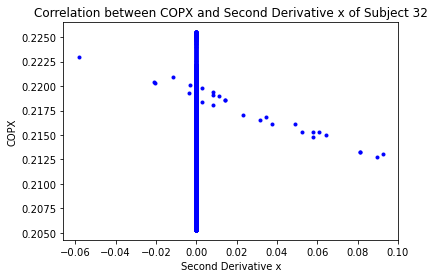

[[ 1.         -0.01846818]
 [-0.01846818  1.        ]]


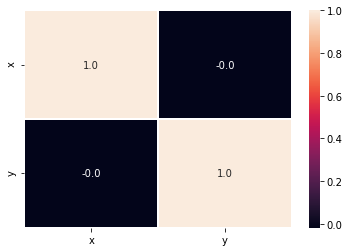

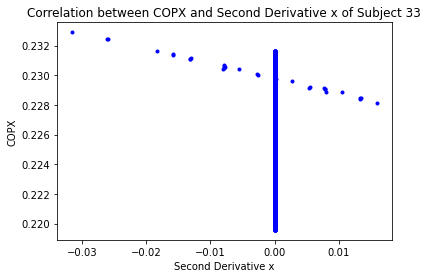

[[ 1.         -0.05498683]
 [-0.05498683  1.        ]]


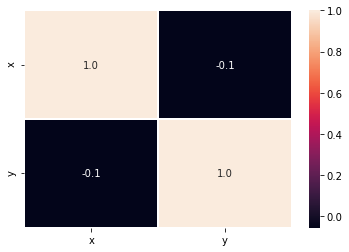

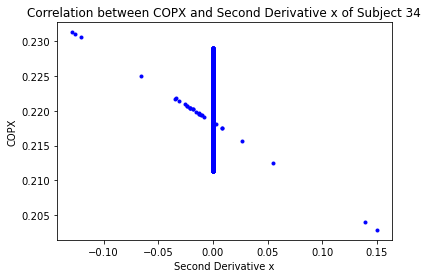

[[ 1.         -0.09733751]
 [-0.09733751  1.        ]]


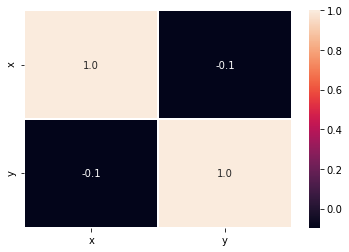

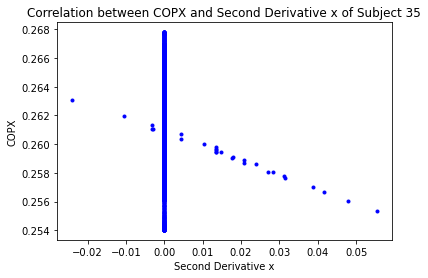

[[ 1.        -0.0658282]
 [-0.0658282  1.       ]]


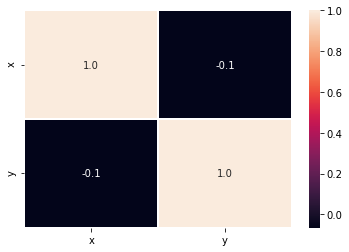

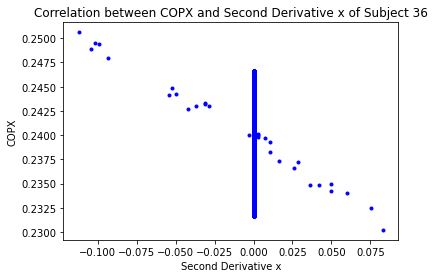

[[ 1.        -0.1143715]
 [-0.1143715  1.       ]]


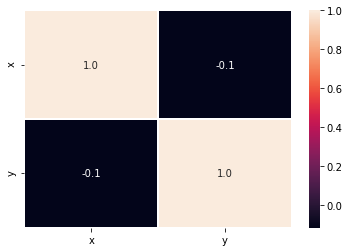

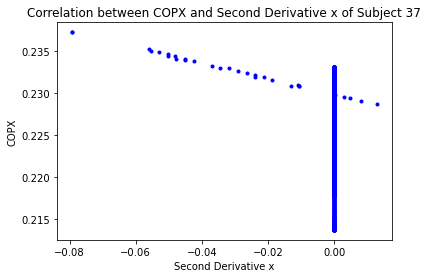

[[ 1.         -0.15653006]
 [-0.15653006  1.        ]]


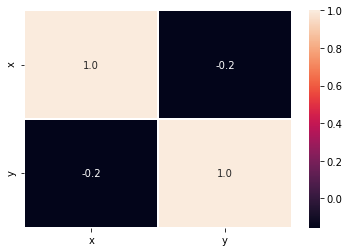

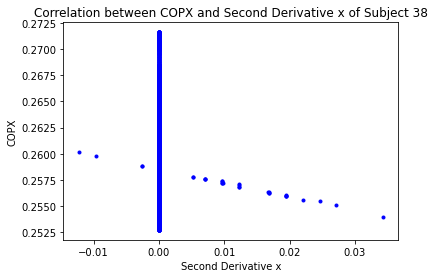

[[ 1.         -0.09053709]
 [-0.09053709  1.        ]]


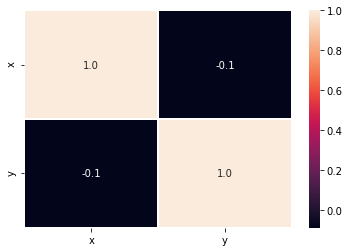

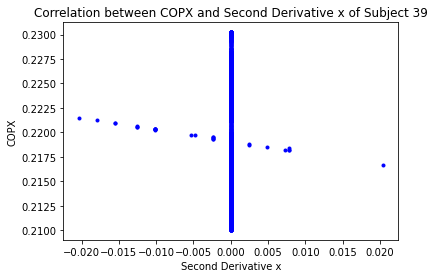

[[ 1.        -0.0220099]
 [-0.0220099  1.       ]]


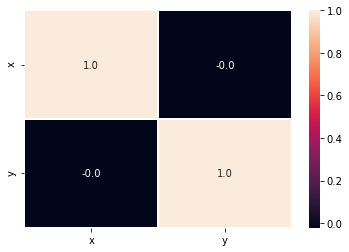

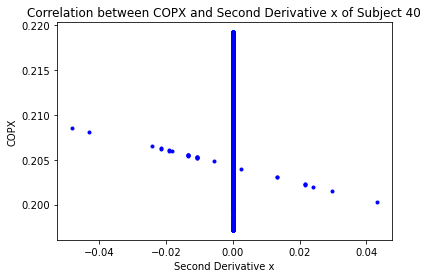

[[ 1.         -0.01503134]
 [-0.01503134  1.        ]]


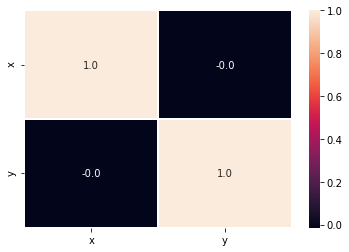

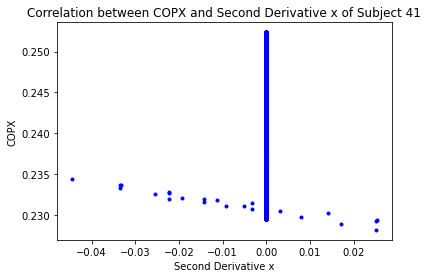

[[1.       0.038192]
 [0.038192 1.      ]]


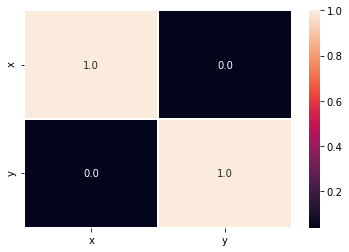

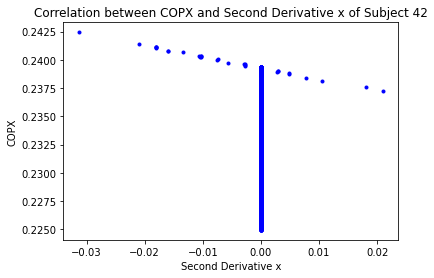

[[ 1.         -0.10611309]
 [-0.10611309  1.        ]]


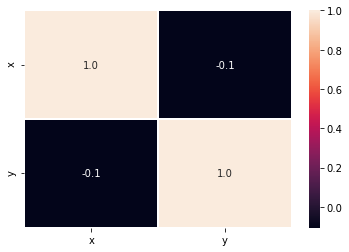

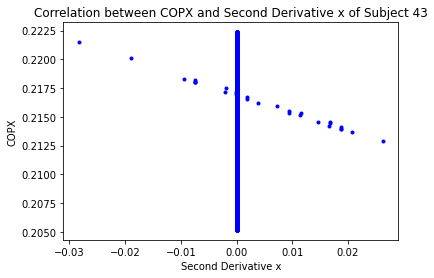

[[ 1.         -0.01314487]
 [-0.01314487  1.        ]]


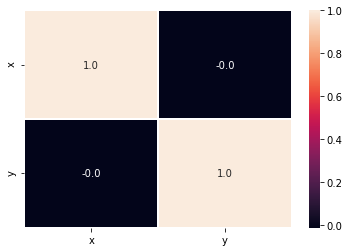

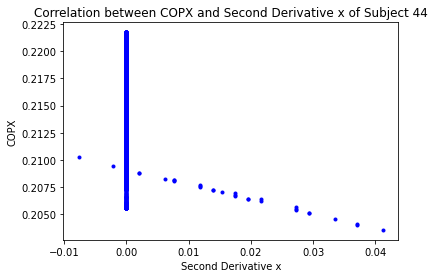

[[ 1.         -0.18975416]
 [-0.18975416  1.        ]]


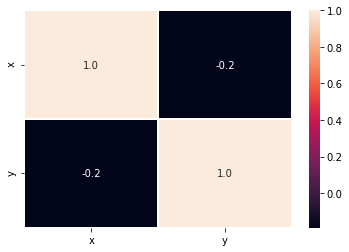

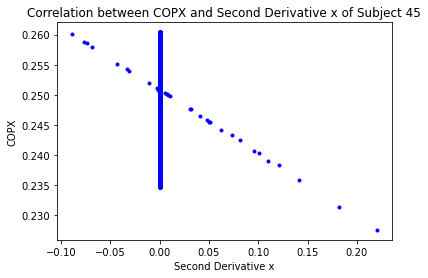

[[ 1.        -0.0733902]
 [-0.0733902  1.       ]]


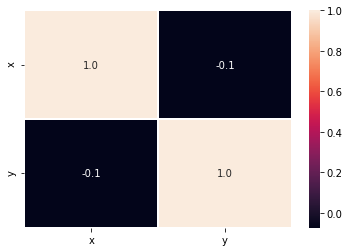

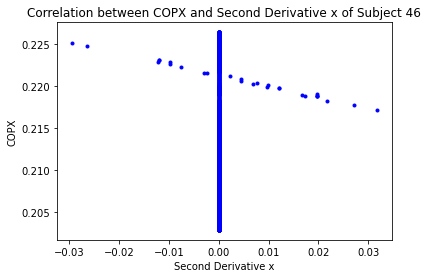

[[1.         0.01165908]
 [0.01165908 1.        ]]


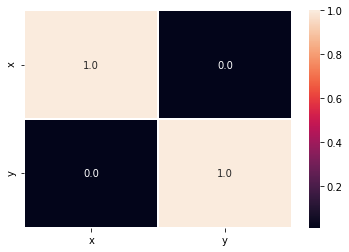

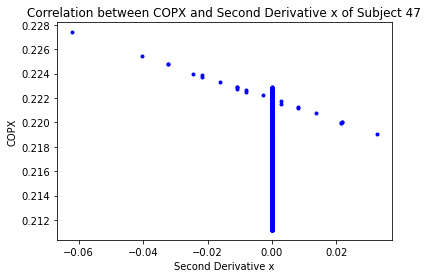

[[ 1.         -0.08612229]
 [-0.08612229  1.        ]]


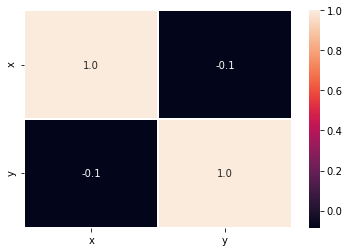

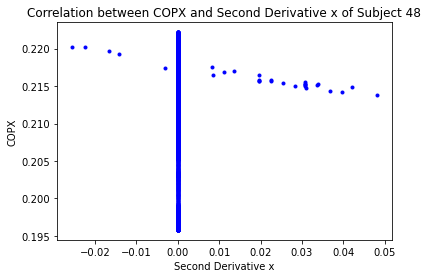

[[1.         0.01448718]
 [0.01448718 1.        ]]


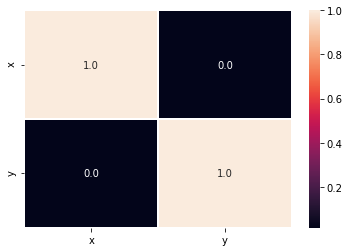

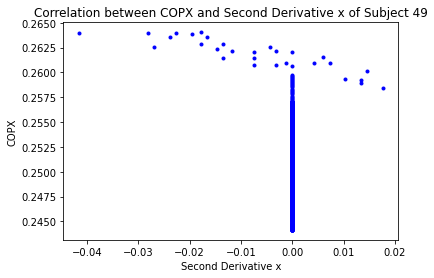

[[ 1.         -0.16434833]
 [-0.16434833  1.        ]]


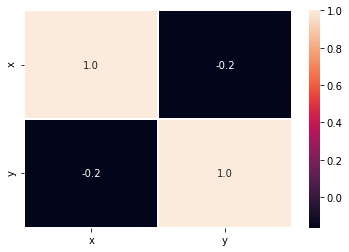

In [7]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2x,
         'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative x")
    plt.ylabel("COPX")
    plt.title("Correlation between COPX and Second Derivative x of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2x,COPXmatrix)
    print(r)
    plt.figure()
    data={'x':d2x,
          'y': COPXmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

# Correlation between COPZ and Second Derivative z

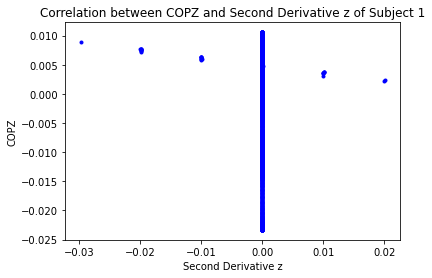

[[ 1.        -0.0383703]
 [-0.0383703  1.       ]]


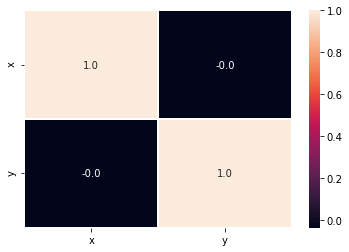

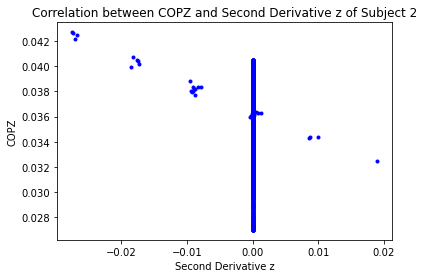

[[ 1.         -0.11437509]
 [-0.11437509  1.        ]]


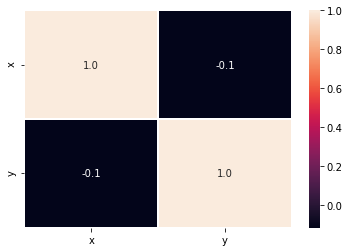

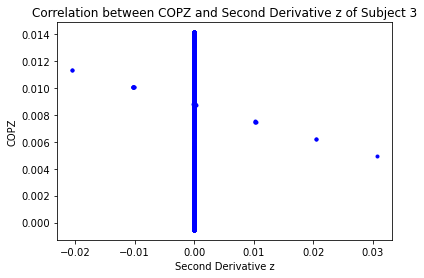

[[ 1.        -0.0239472]
 [-0.0239472  1.       ]]


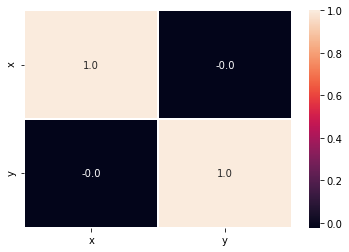

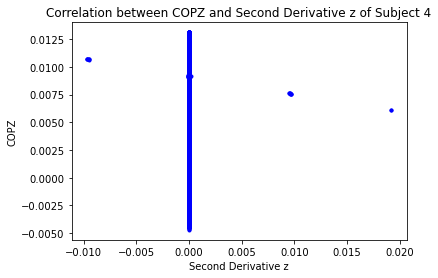

[[ 1.         -0.01809213]
 [-0.01809213  1.        ]]


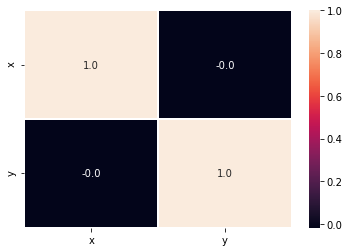

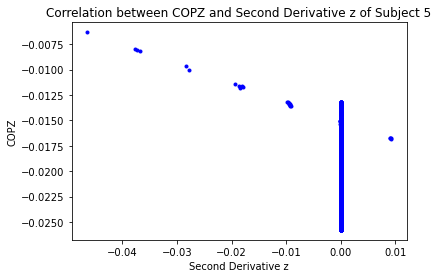

[[ 1.         -0.18141673]
 [-0.18141673  1.        ]]


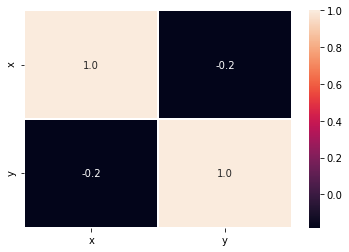

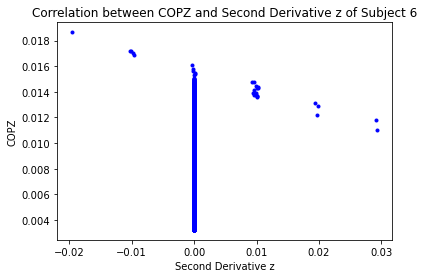

[[1.         0.04002058]
 [0.04002058 1.        ]]


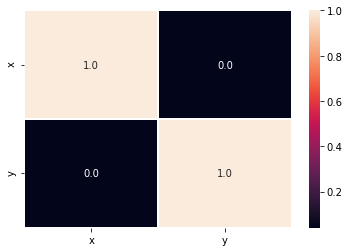

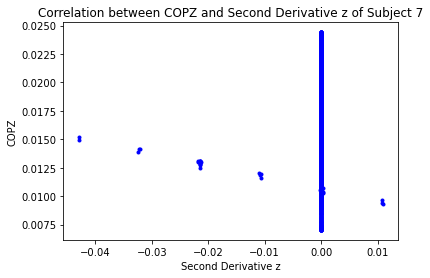

[[1.         0.01890815]
 [0.01890815 1.        ]]


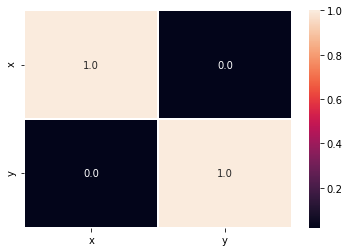

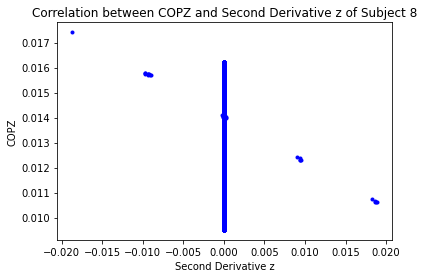

[[ 1.         -0.08260135]
 [-0.08260135  1.        ]]


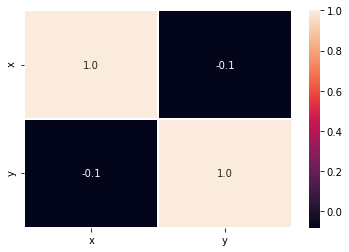

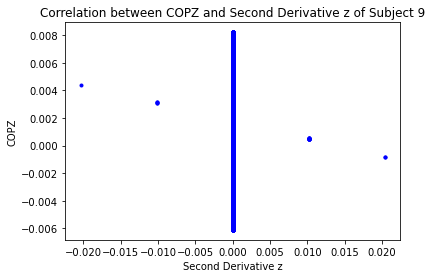

[[ 1.        -0.0238393]
 [-0.0238393  1.       ]]


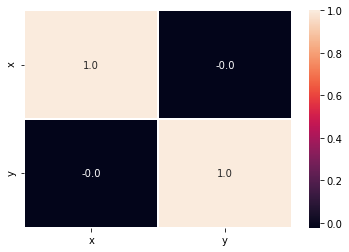

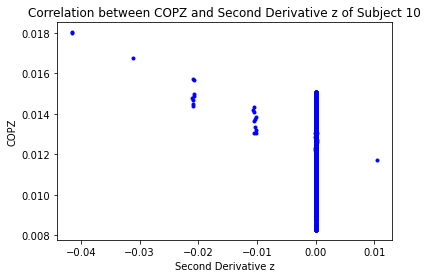

[[ 1.         -0.18899319]
 [-0.18899319  1.        ]]


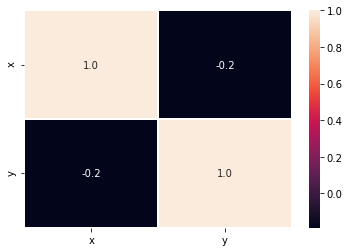

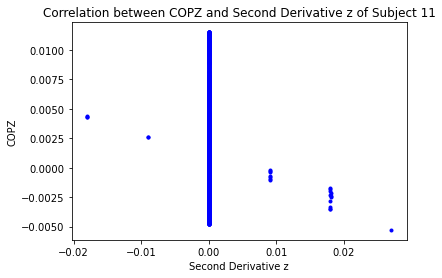

[[ 1.         -0.05873205]
 [-0.05873205  1.        ]]


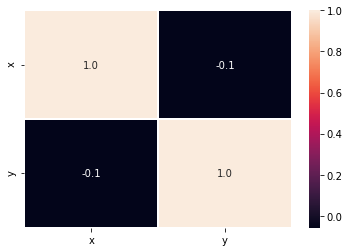

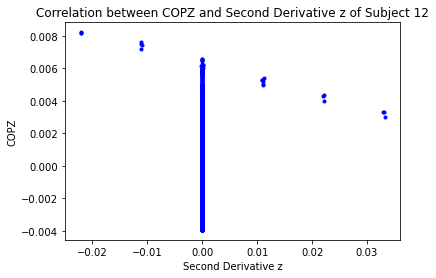

[[1.        0.0071126]
 [0.0071126 1.       ]]


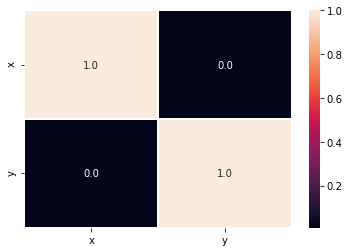

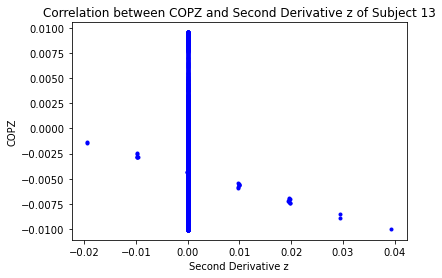

[[ 1.         -0.06386237]
 [-0.06386237  1.        ]]


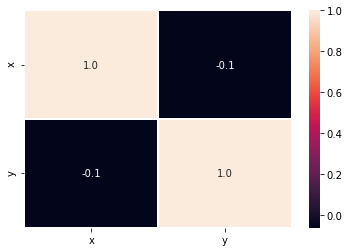

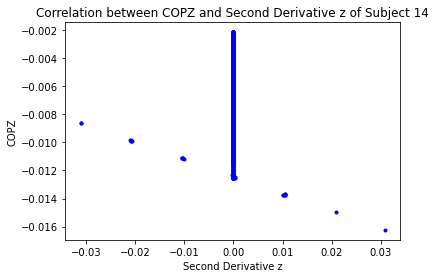

[[ 1.         -0.02485243]
 [-0.02485243  1.        ]]


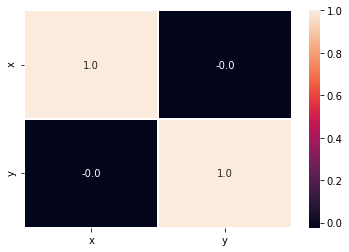

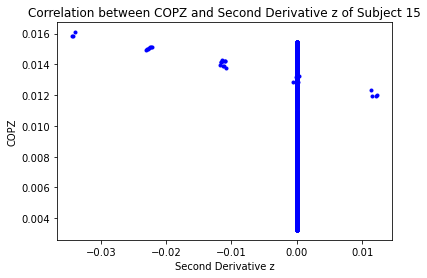

[[ 1.         -0.12027031]
 [-0.12027031  1.        ]]


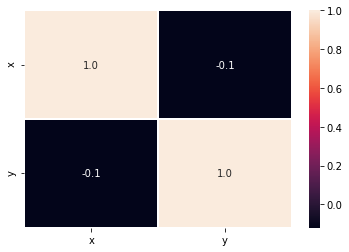

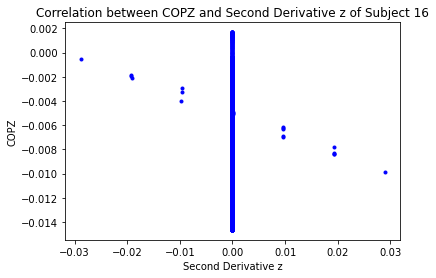

[[ 1.         -0.04808618]
 [-0.04808618  1.        ]]


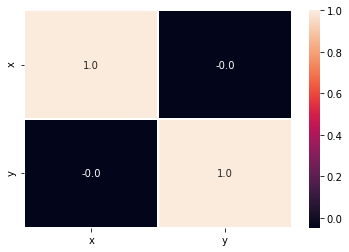

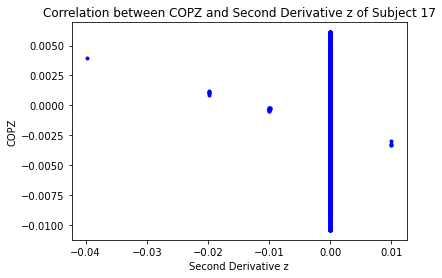

[[ 1.         -0.02907988]
 [-0.02907988  1.        ]]


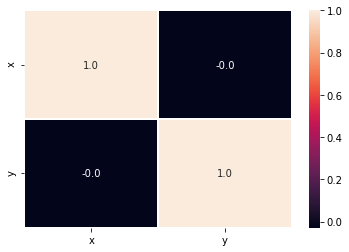

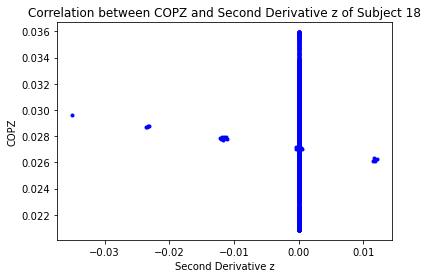

[[ 1.         -0.02536824]
 [-0.02536824  1.        ]]


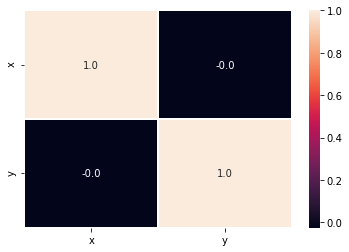

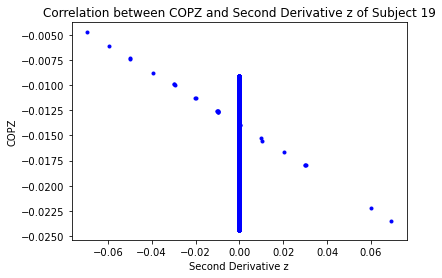

[[ 1.        -0.1199055]
 [-0.1199055  1.       ]]


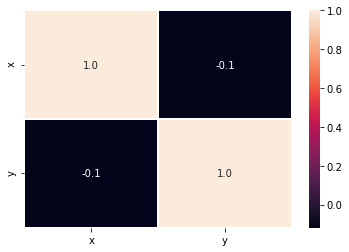

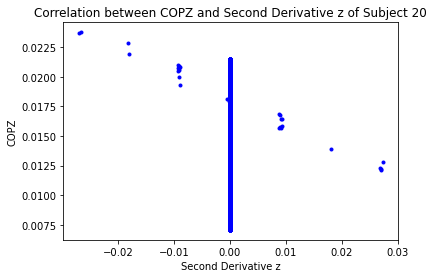

[[ 1.         -0.06296694]
 [-0.06296694  1.        ]]


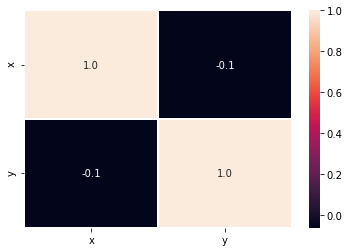

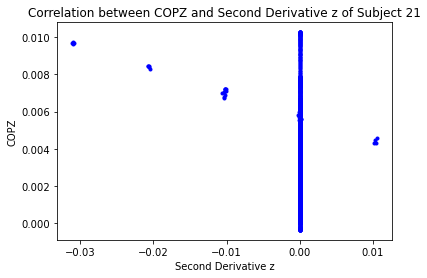

[[ 1.         -0.12392417]
 [-0.12392417  1.        ]]


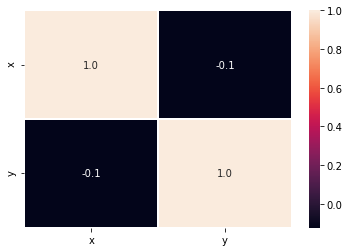

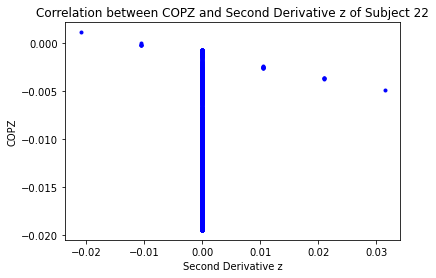

[[1.         0.04241888]
 [0.04241888 1.        ]]


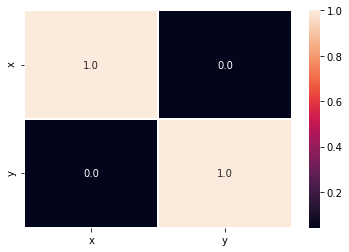

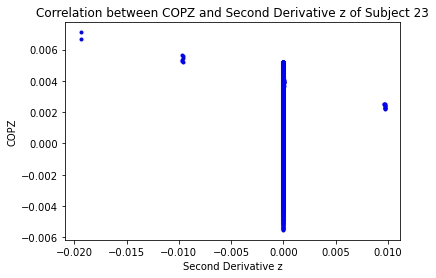

[[ 1.         -0.04308786]
 [-0.04308786  1.        ]]


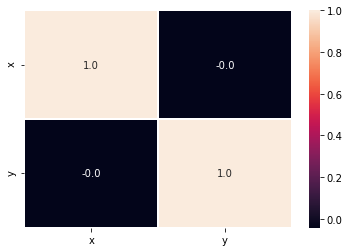

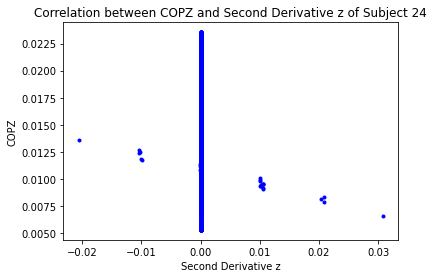

[[ 1.         -0.05481879]
 [-0.05481879  1.        ]]


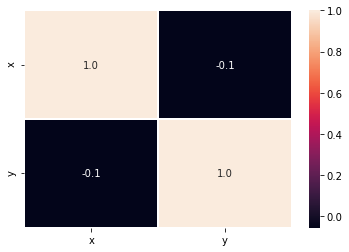

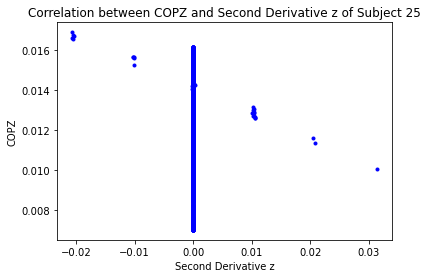

[[ 1.         -0.05526865]
 [-0.05526865  1.        ]]


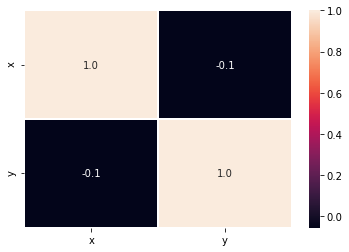

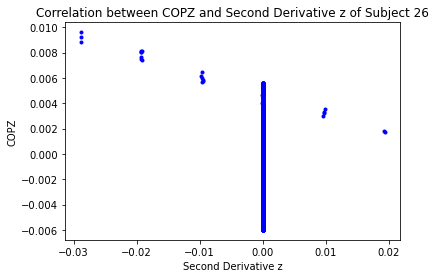

[[ 1.        -0.1399411]
 [-0.1399411  1.       ]]


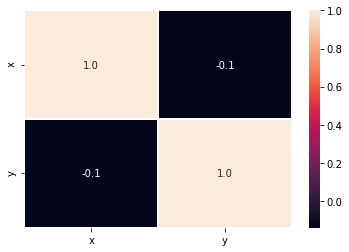

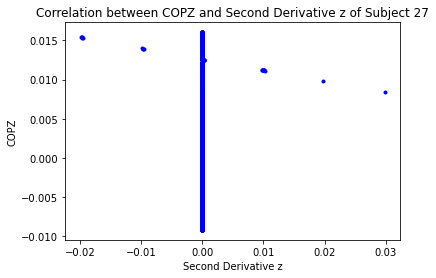

[[ 1.         -0.02547683]
 [-0.02547683  1.        ]]


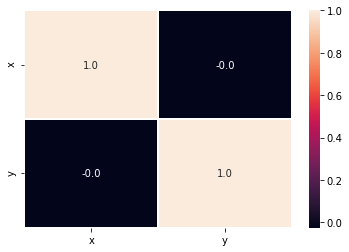

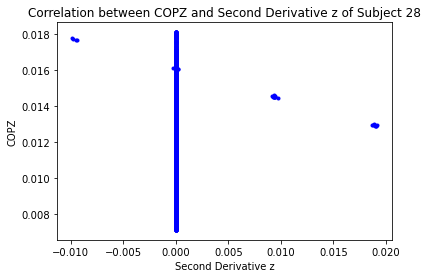

[[1.         0.00404252]
 [0.00404252 1.        ]]


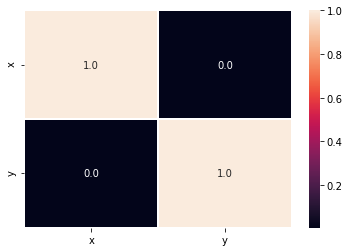

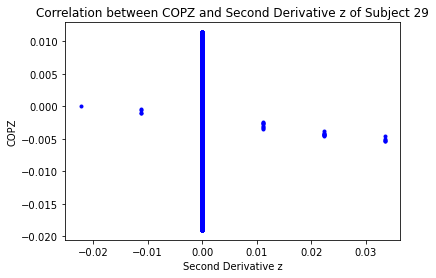

[[ 1.         -0.00305622]
 [-0.00305622  1.        ]]


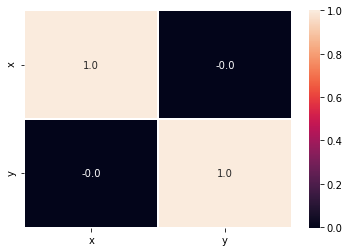

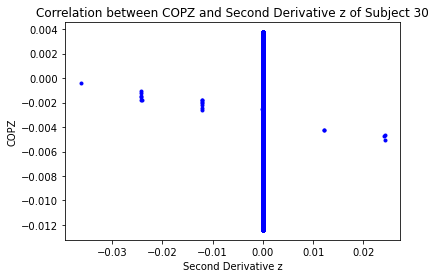

[[ 1.         -0.03019661]
 [-0.03019661  1.        ]]


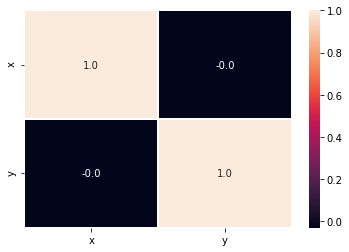

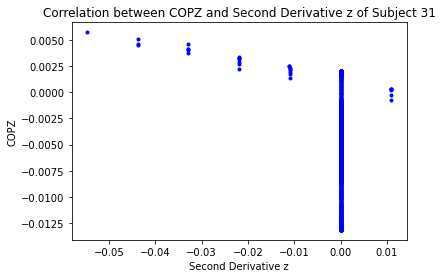

[[ 1.         -0.17416715]
 [-0.17416715  1.        ]]


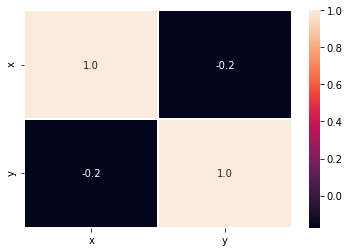

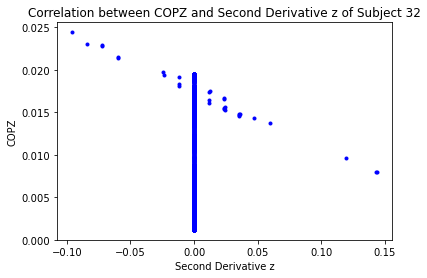

[[ 1.         -0.03377467]
 [-0.03377467  1.        ]]


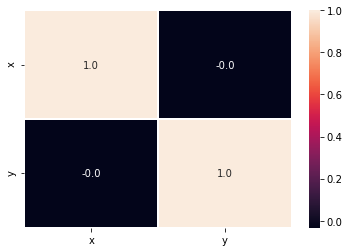

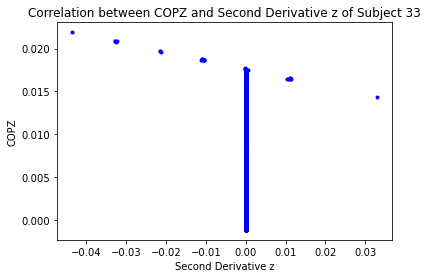

[[ 1.         -0.11104308]
 [-0.11104308  1.        ]]


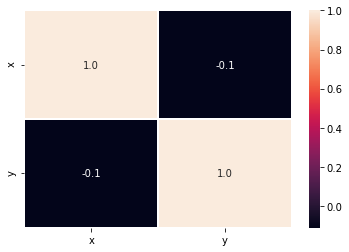

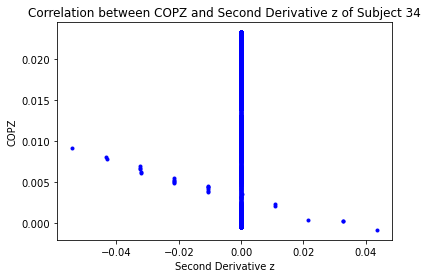

[[1.         0.03663823]
 [0.03663823 1.        ]]


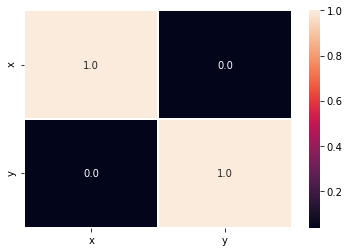

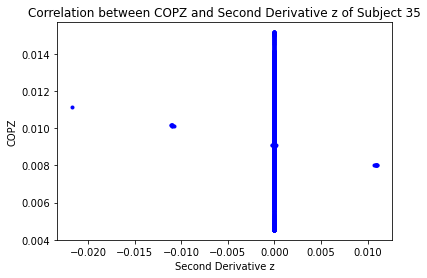

[[ 1.         -0.02629529]
 [-0.02629529  1.        ]]


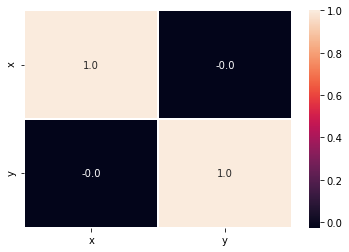

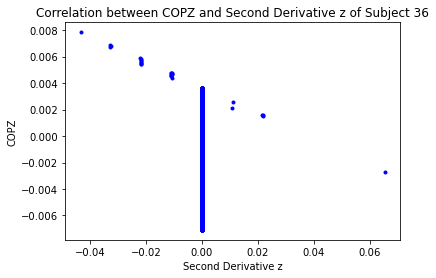

[[ 1.         -0.11011934]
 [-0.11011934  1.        ]]


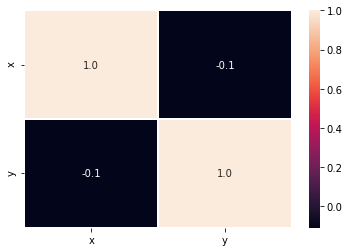

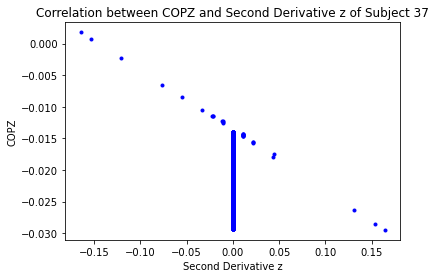

[[ 1.         -0.13108406]
 [-0.13108406  1.        ]]


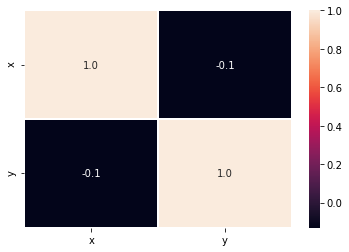

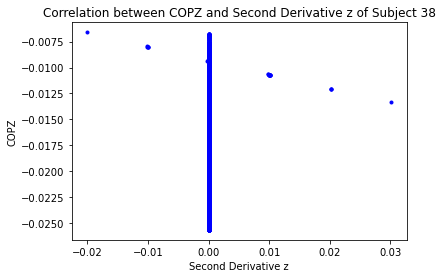

[[1.         0.01905022]
 [0.01905022 1.        ]]


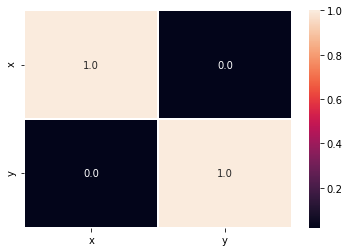

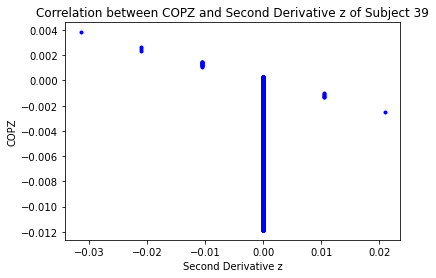

[[ 1.         -0.08234277]
 [-0.08234277  1.        ]]


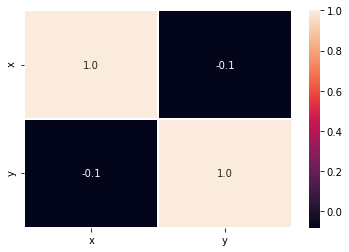

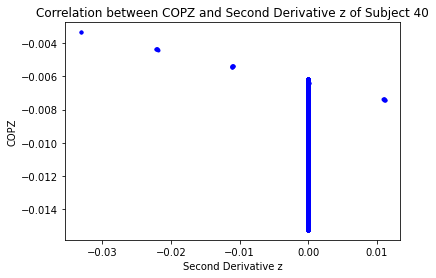

[[ 1.         -0.11755152]
 [-0.11755152  1.        ]]


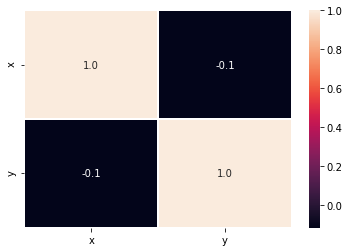

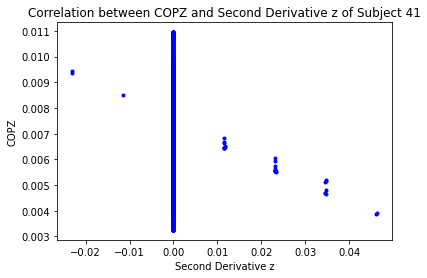

[[ 1.         -0.05642853]
 [-0.05642853  1.        ]]


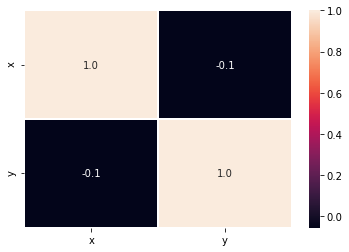

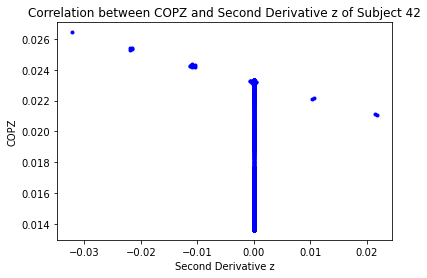

[[ 1.         -0.12173221]
 [-0.12173221  1.        ]]


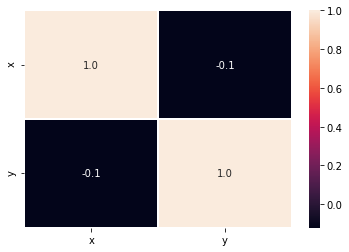

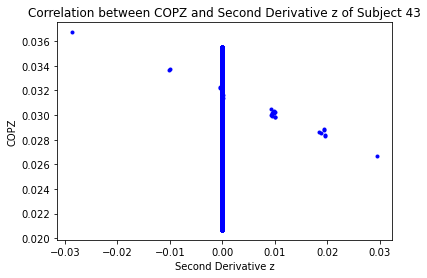

[[1.         0.00986061]
 [0.00986061 1.        ]]


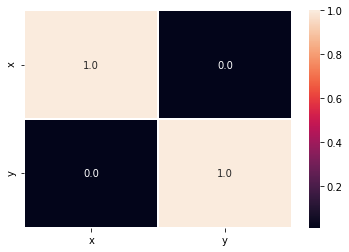

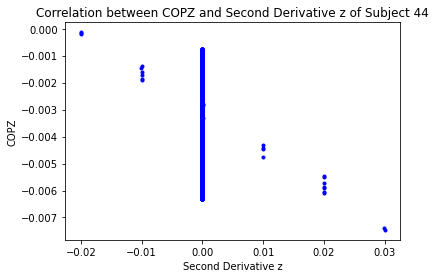

[[ 1.         -0.12565595]
 [-0.12565595  1.        ]]


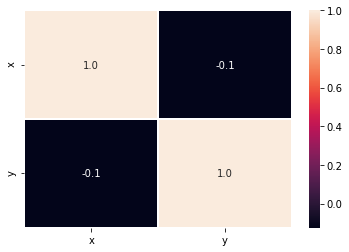

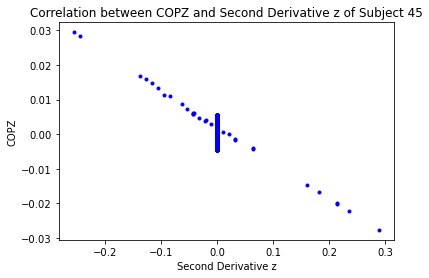

[[ 1.         -0.41543475]
 [-0.41543475  1.        ]]


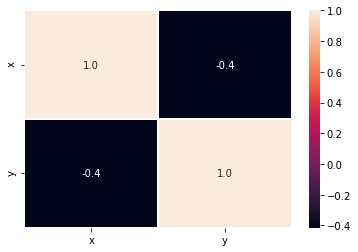

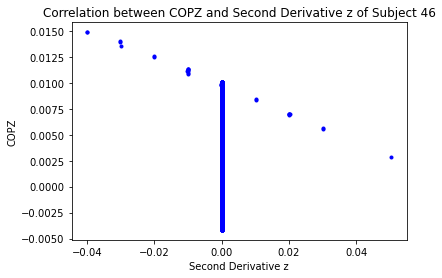

[[ 1.         -0.07422781]
 [-0.07422781  1.        ]]


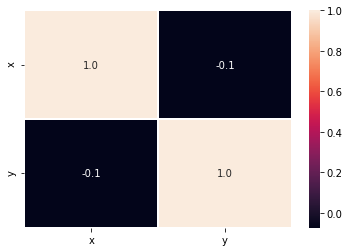

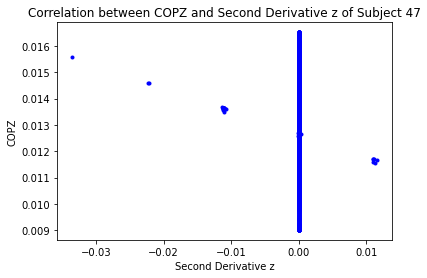

[[ 1.         -0.03652431]
 [-0.03652431  1.        ]]


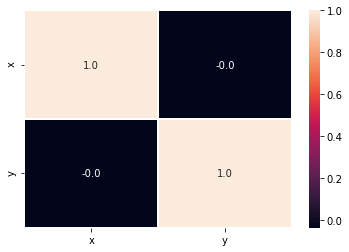

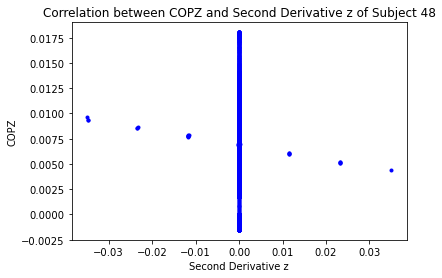

[[ 1.         -0.02355224]
 [-0.02355224  1.        ]]


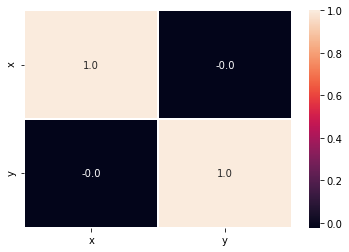

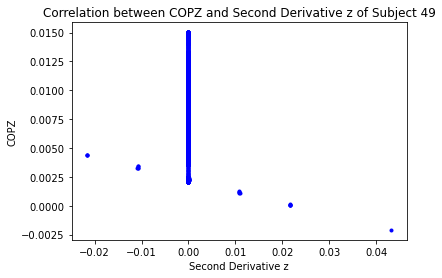

[[ 1.         -0.07788531]
 [-0.07788531  1.        ]]


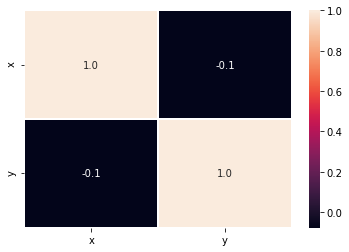

In [8]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2z,
         'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative z")
    plt.ylabel("COPZ")
    plt.title("Correlation between COPZ and Second Derivative z of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2z,COPZmatrix)
    print(r)
    plt.figure()
    data={'x':d2z,
          'y': COPZmatrix
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

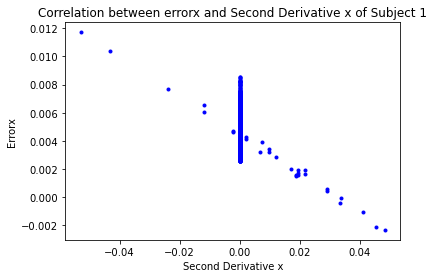

[[ 1.         -0.09580624]
 [-0.09580624  1.        ]]


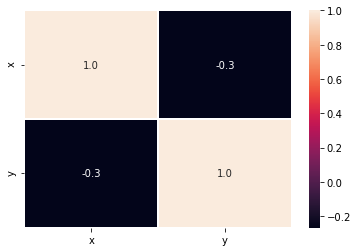

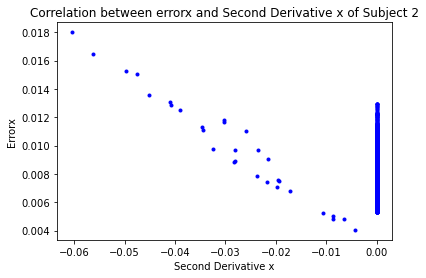

[[ 1.         -0.22668354]
 [-0.22668354  1.        ]]


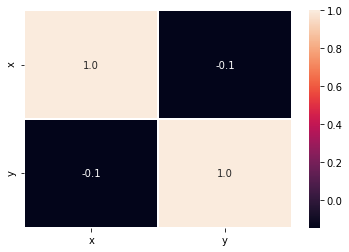

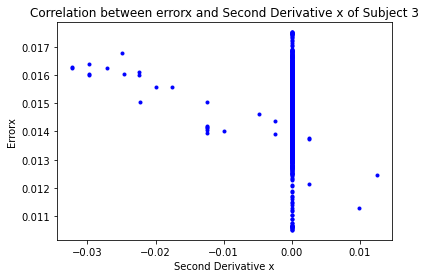

[[ 1.         -0.16194931]
 [-0.16194931  1.        ]]


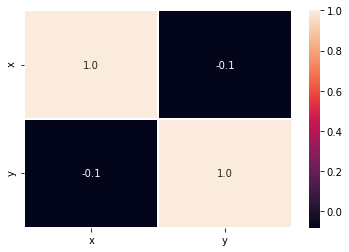

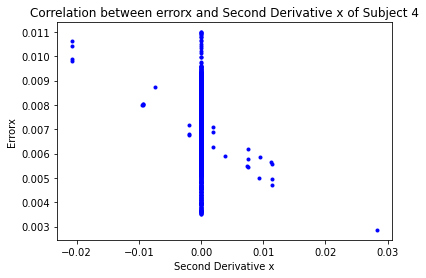

[[ 1.         -0.02182057]
 [-0.02182057  1.        ]]


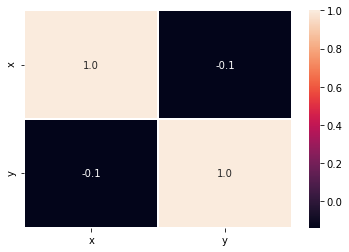

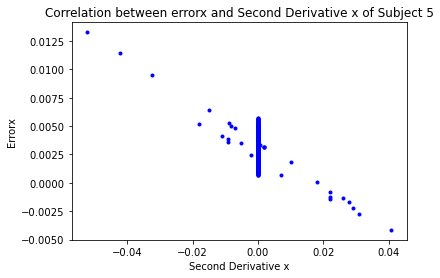

[[ 1.        -0.0473313]
 [-0.0473313  1.       ]]


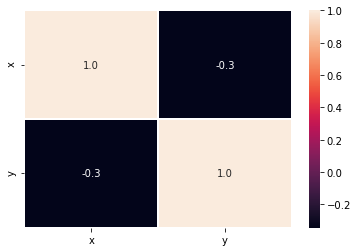

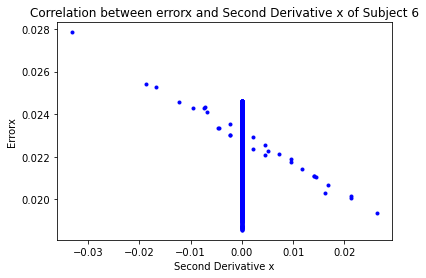

[[ 1.         -0.00951637]
 [-0.00951637  1.        ]]


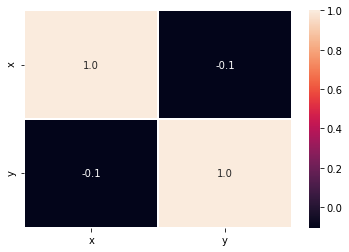

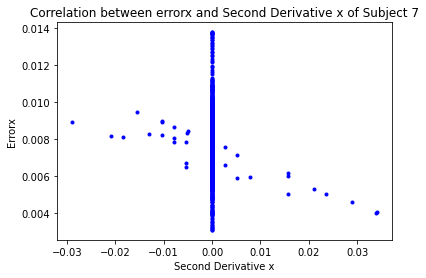

[[ 1.         -0.00587161]
 [-0.00587161  1.        ]]


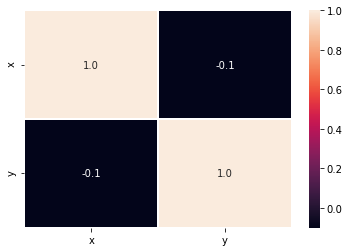

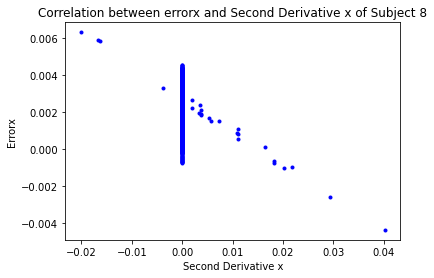

[[ 1.         -0.03255949]
 [-0.03255949  1.        ]]


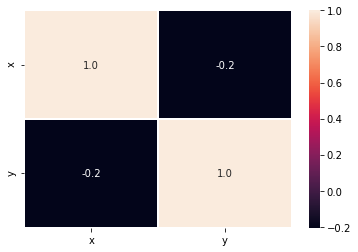

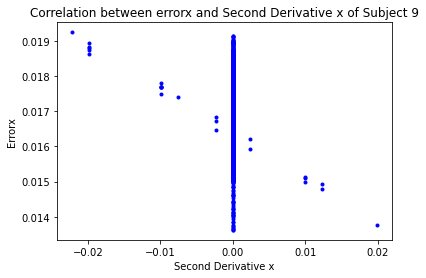

[[1.         0.00657613]
 [0.00657613 1.        ]]


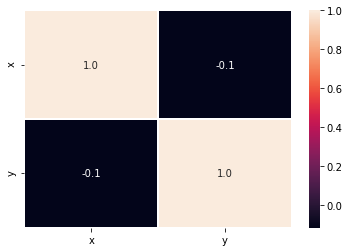

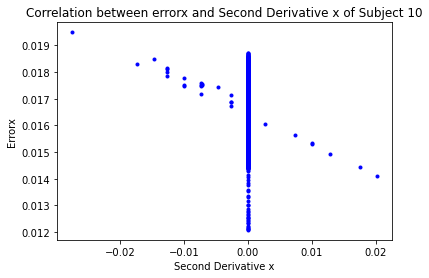

[[ 1.         -0.03617527]
 [-0.03617527  1.        ]]


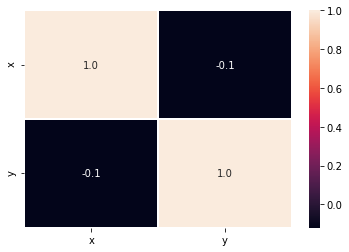

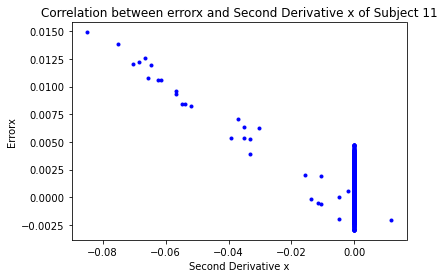

[[ 1.         -0.20329582]
 [-0.20329582  1.        ]]


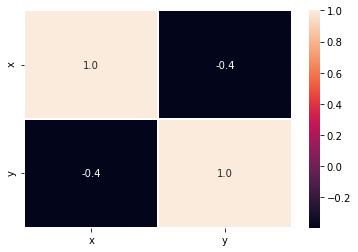

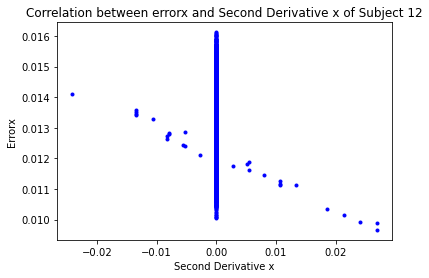

[[ 1.         -0.00771344]
 [-0.00771344  1.        ]]


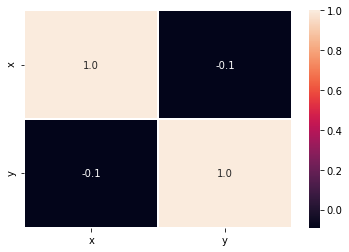

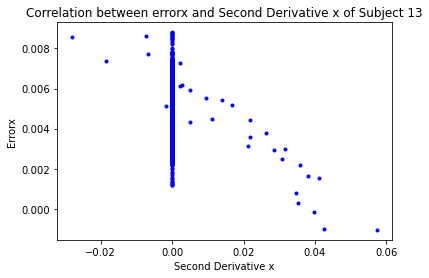

[[ 1.         -0.04125995]
 [-0.04125995  1.        ]]


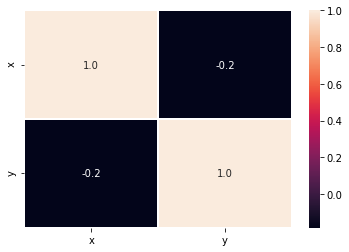

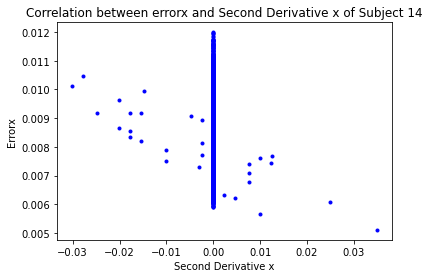

[[ 1.         -0.06172253]
 [-0.06172253  1.        ]]


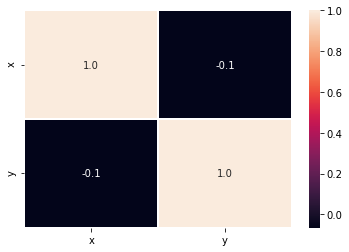

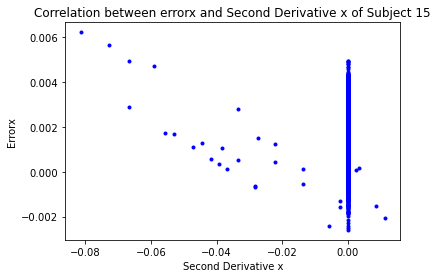

[[ 1.         -0.04928773]
 [-0.04928773  1.        ]]


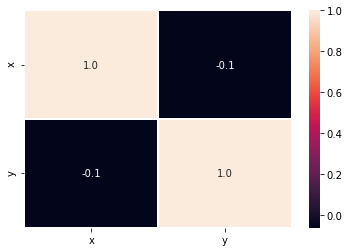

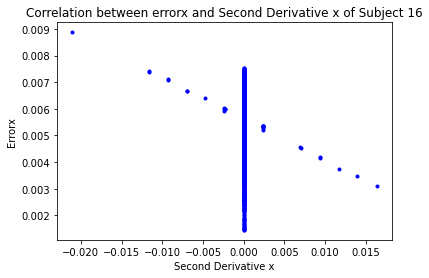

[[ 1.         -0.01525455]
 [-0.01525455  1.        ]]


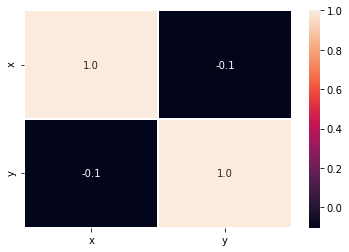

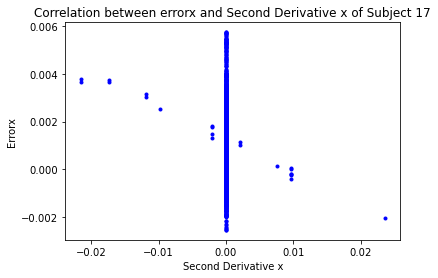

[[ 1.        -0.0339473]
 [-0.0339473  1.       ]]


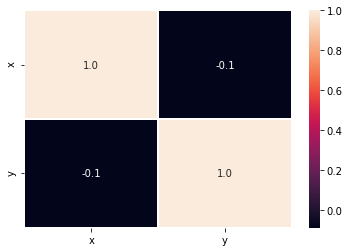

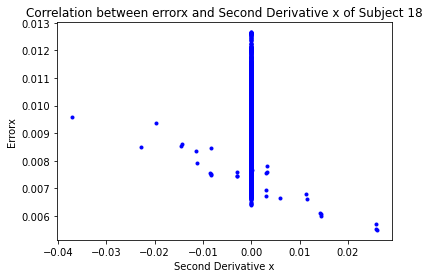

[[ 1.         -0.02406467]
 [-0.02406467  1.        ]]


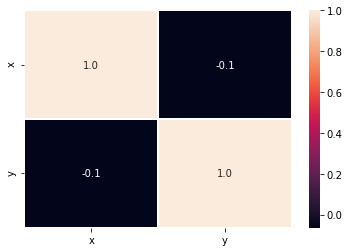

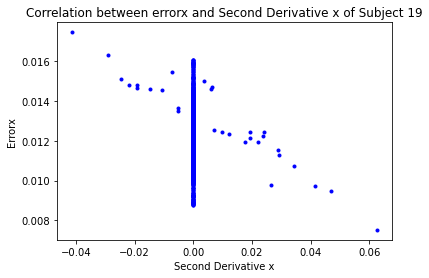

[[ 1.         -0.00915888]
 [-0.00915888  1.        ]]


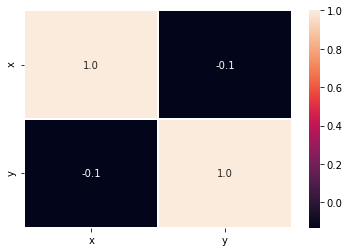

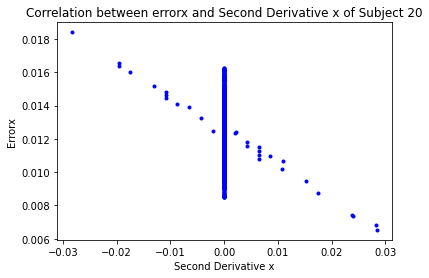

[[ 1.         -0.04466914]
 [-0.04466914  1.        ]]


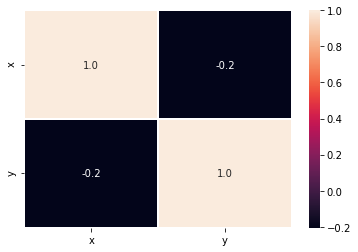

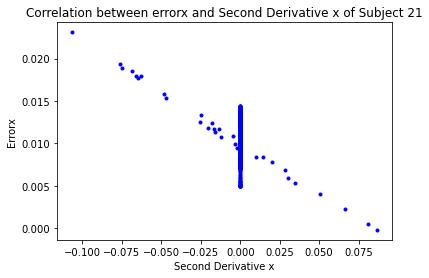

[[ 1.         -0.13111697]
 [-0.13111697  1.        ]]


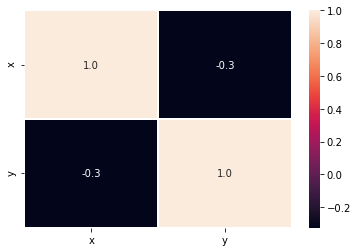

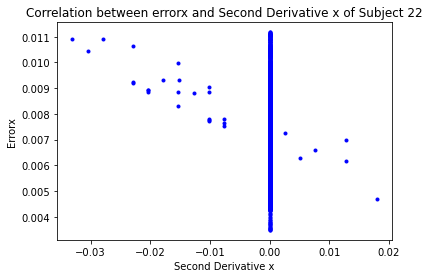

[[ 1.         -0.16658107]
 [-0.16658107  1.        ]]


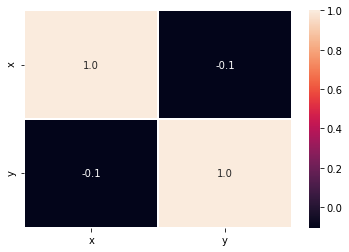

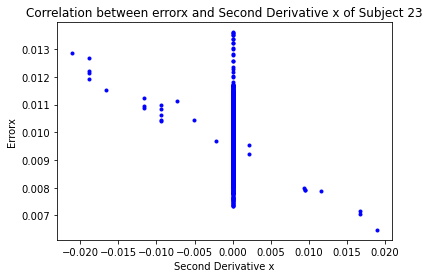

[[ 1.         -0.08680855]
 [-0.08680855  1.        ]]


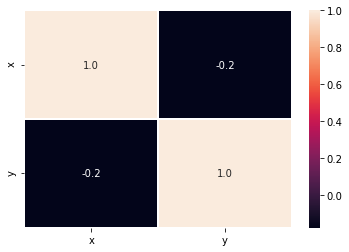

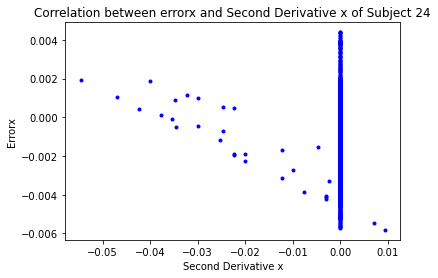

[[ 1.         -0.05352237]
 [-0.05352237  1.        ]]


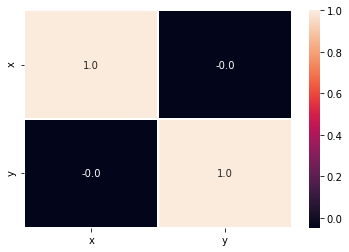

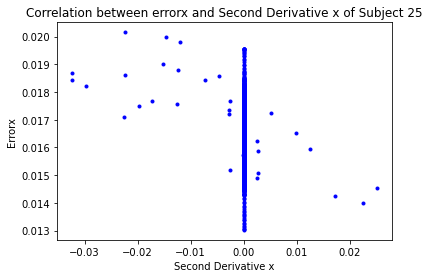

[[ 1.         -0.07317815]
 [-0.07317815  1.        ]]


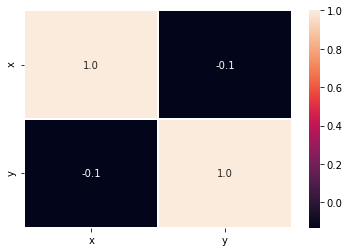

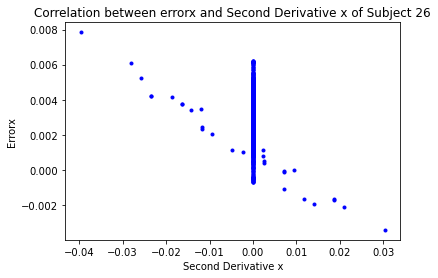

[[ 1.         -0.08608609]
 [-0.08608609  1.        ]]


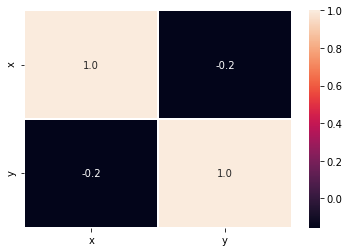

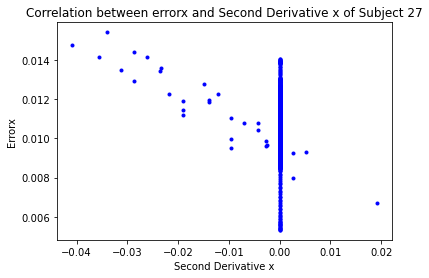

[[ 1.         -0.26231142]
 [-0.26231142  1.        ]]


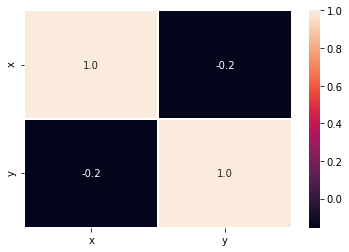

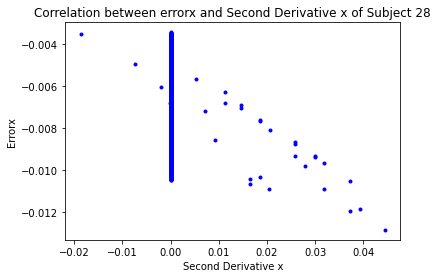

[[ 1.         -0.00749063]
 [-0.00749063  1.        ]]


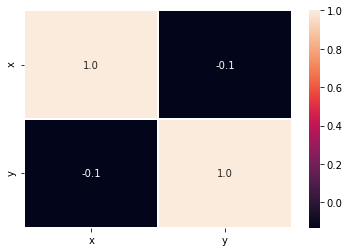

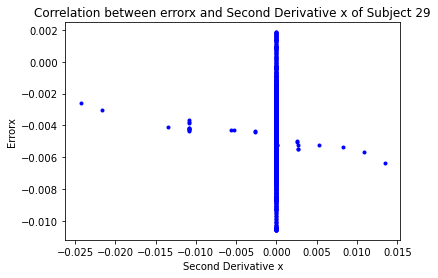

[[ 1.         -0.05291048]
 [-0.05291048  1.        ]]


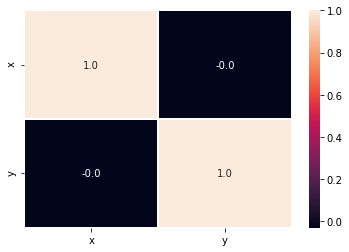

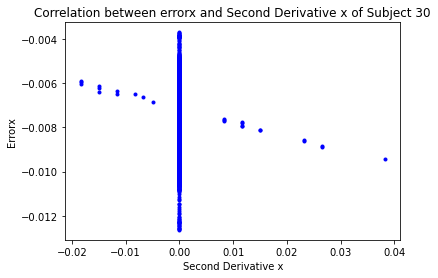

[[1.         0.00813167]
 [0.00813167 1.        ]]


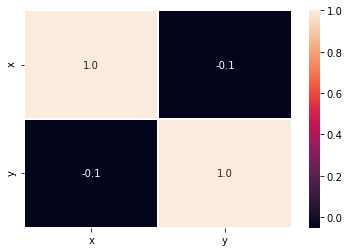

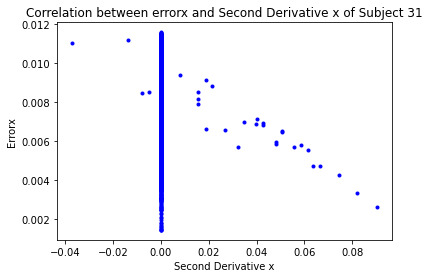

[[ 1.         -0.05001402]
 [-0.05001402  1.        ]]


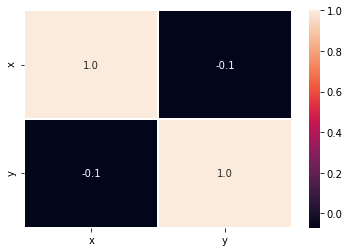

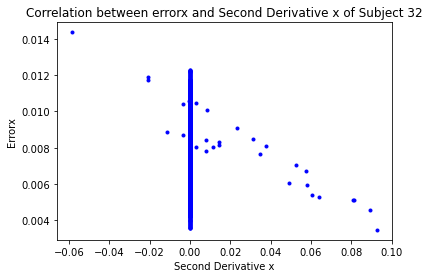

[[ 1.         -0.01846818]
 [-0.01846818  1.        ]]


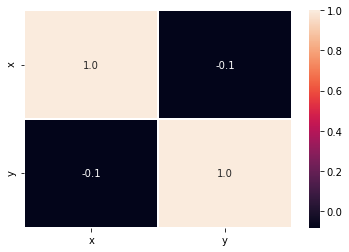

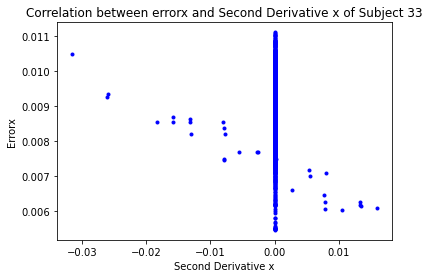

[[ 1.         -0.05498683]
 [-0.05498683  1.        ]]


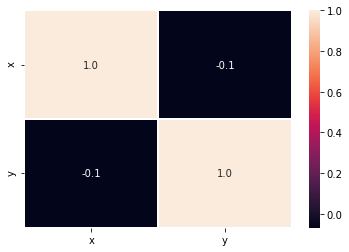

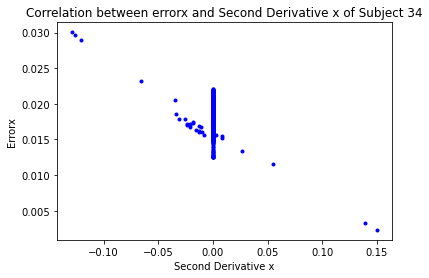

[[ 1.         -0.09733751]
 [-0.09733751  1.        ]]


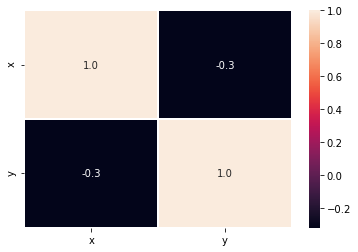

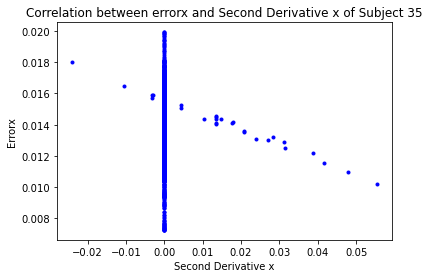

[[ 1.        -0.0658282]
 [-0.0658282  1.       ]]


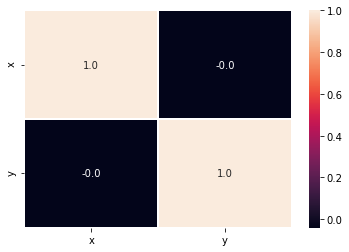

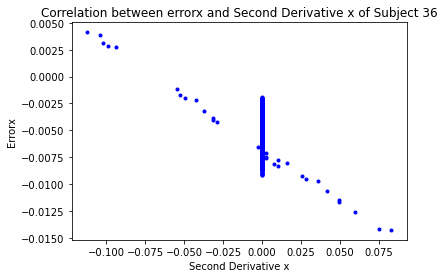

[[ 1.        -0.1143715]
 [-0.1143715  1.       ]]


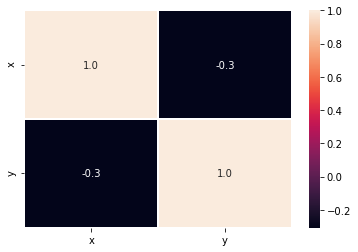

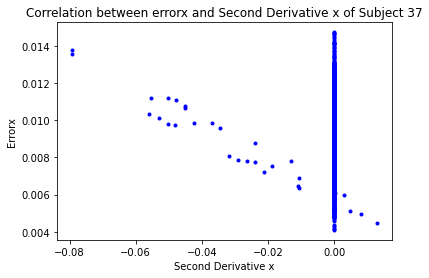

[[ 1.         -0.15653006]
 [-0.15653006  1.        ]]


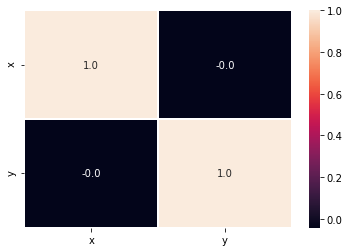

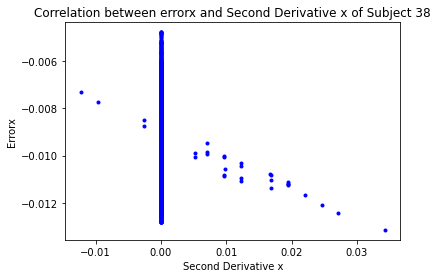

[[ 1.         -0.09053709]
 [-0.09053709  1.        ]]


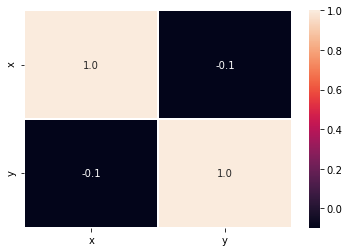

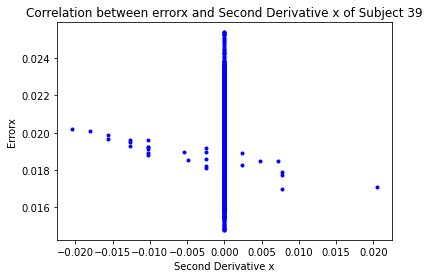

[[ 1.        -0.0220099]
 [-0.0220099  1.       ]]


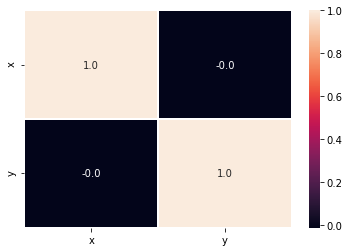

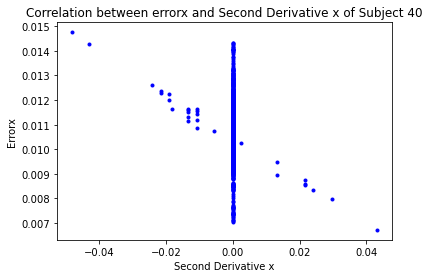

[[ 1.         -0.01503134]
 [-0.01503134  1.        ]]


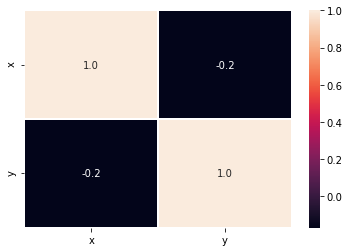

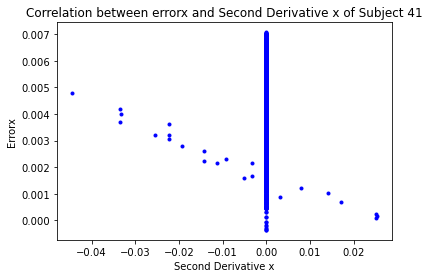

[[1.       0.038192]
 [0.038192 1.      ]]


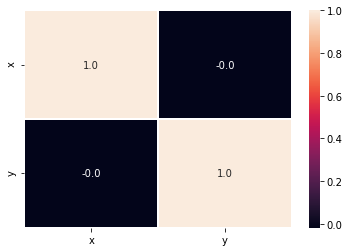

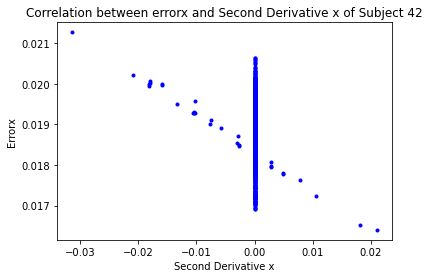

[[ 1.         -0.10611309]
 [-0.10611309  1.        ]]


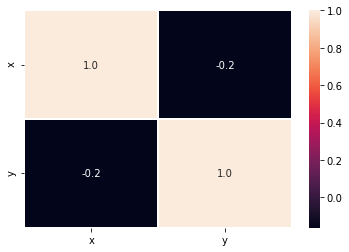

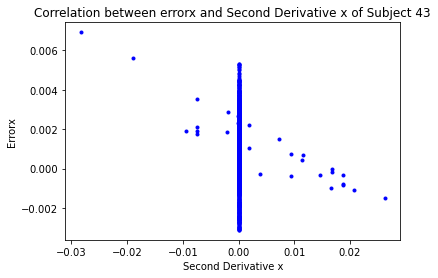

[[ 1.         -0.01314487]
 [-0.01314487  1.        ]]


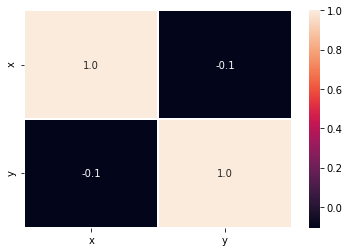

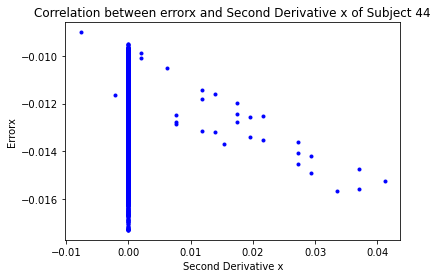

[[ 1.         -0.18975416]
 [-0.18975416  1.        ]]


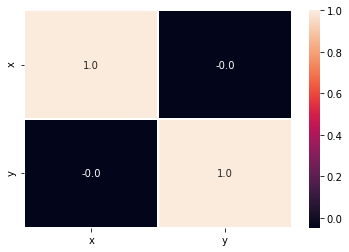

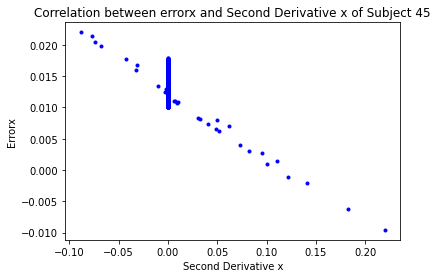

[[ 1.        -0.0733902]
 [-0.0733902  1.       ]]


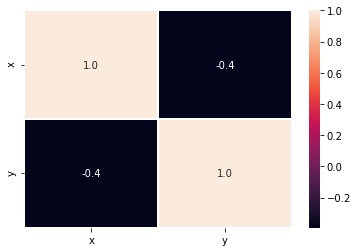

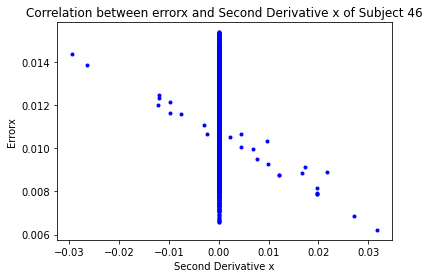

[[1.         0.01165908]
 [0.01165908 1.        ]]


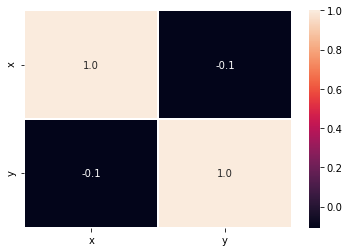

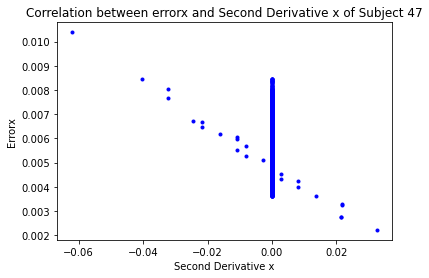

[[ 1.         -0.08612229]
 [-0.08612229  1.        ]]


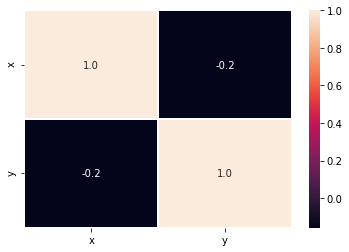

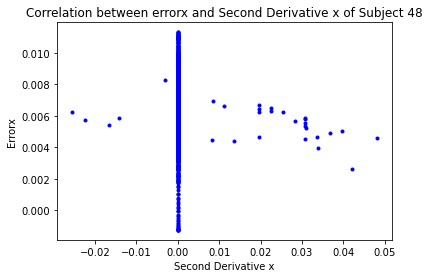

[[1.         0.01448718]
 [0.01448718 1.        ]]


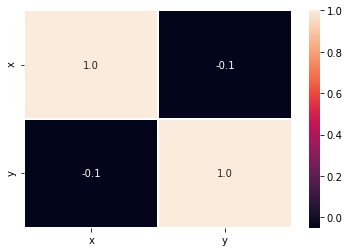

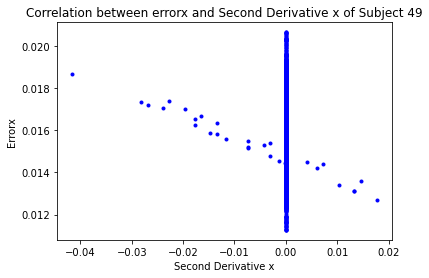

[[ 1.         -0.16434833]
 [-0.16434833  1.        ]]


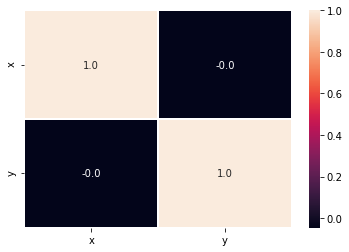

In [9]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2x,
         'y': errorx
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative x")
    plt.ylabel("Errorx")
    plt.title("Correlation between errorx and Second Derivative x of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2x,COPXmatrix)
    print(r)
    plt.figure()
    data={'x':d2x,
          'y': errorx
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()

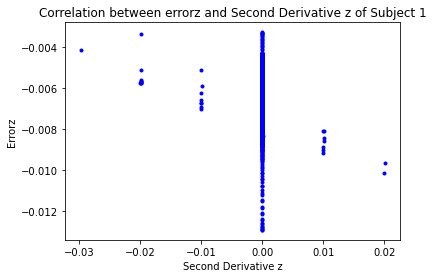

[[ 1.         -0.11212859]
 [-0.11212859  1.        ]]


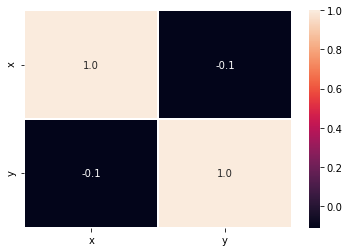

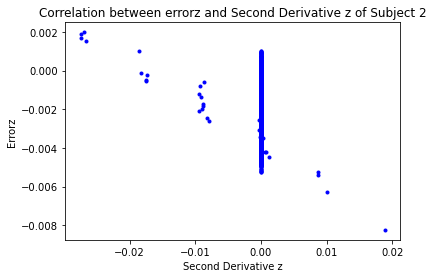

[[ 1.         -0.15649492]
 [-0.15649492  1.        ]]


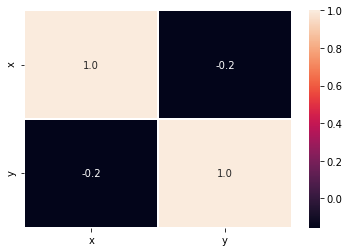

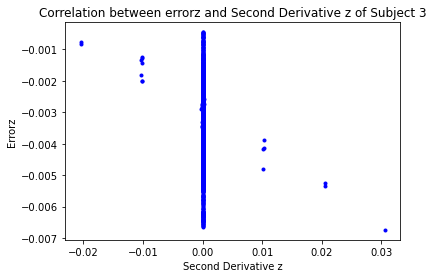

[[ 1.         -0.10834905]
 [-0.10834905  1.        ]]


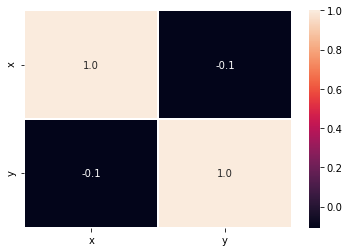

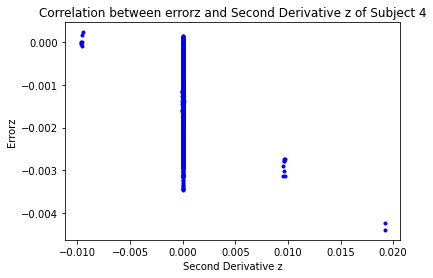

[[ 1.         -0.15589562]
 [-0.15589562  1.        ]]


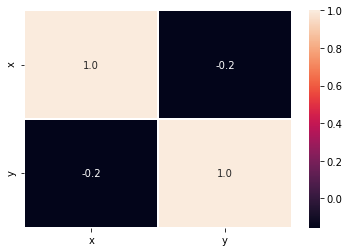

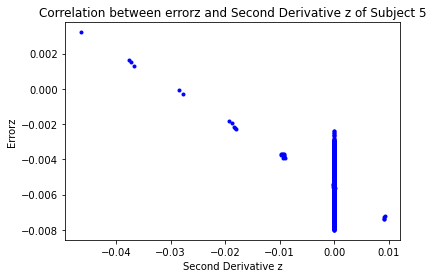

[[ 1.         -0.32958939]
 [-0.32958939  1.        ]]


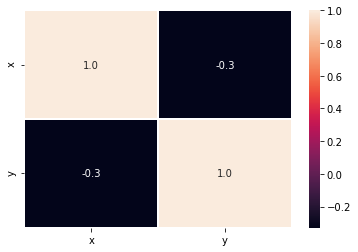

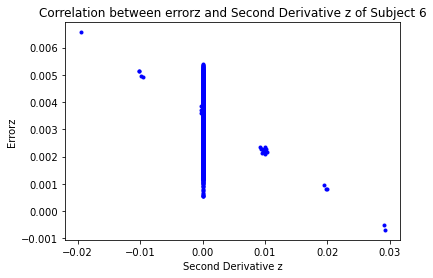

[[ 1.         -0.14279793]
 [-0.14279793  1.        ]]


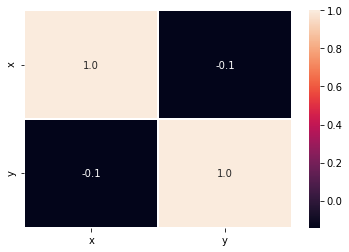

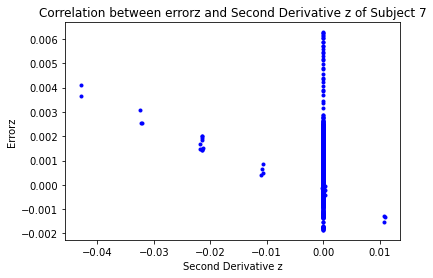

[[ 1.         -0.12301547]
 [-0.12301547  1.        ]]


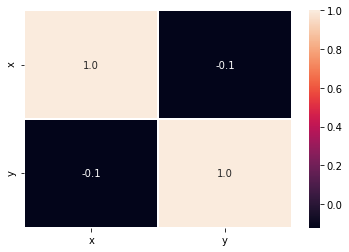

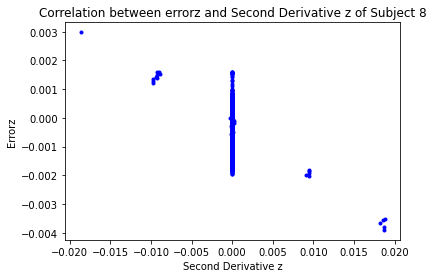

[[ 1.         -0.29590303]
 [-0.29590303  1.        ]]


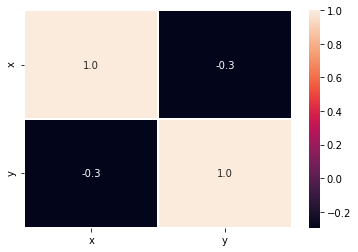

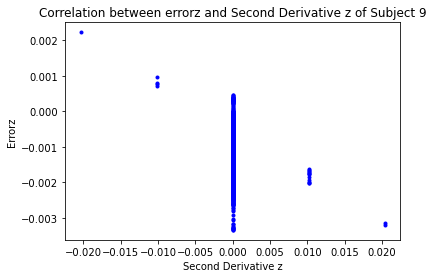

[[ 1.         -0.15306868]
 [-0.15306868  1.        ]]


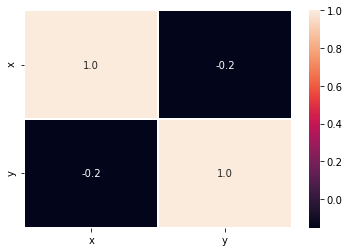

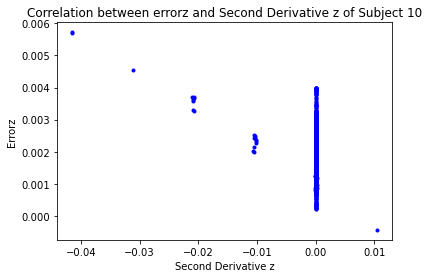

[[ 1.         -0.20417772]
 [-0.20417772  1.        ]]


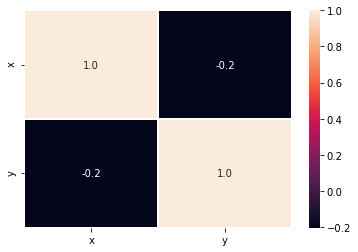

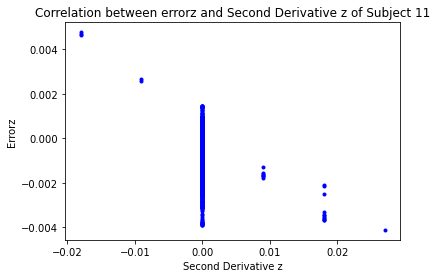

[[ 1.         -0.23948448]
 [-0.23948448  1.        ]]


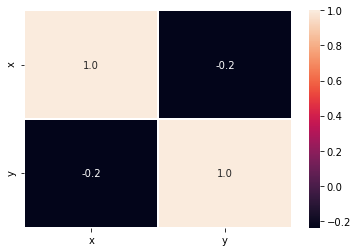

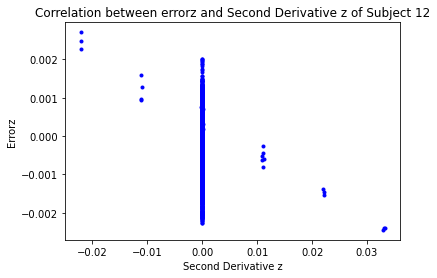

[[ 1.         -0.14018579]
 [-0.14018579  1.        ]]


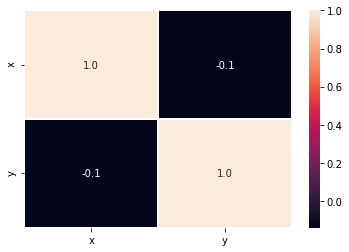

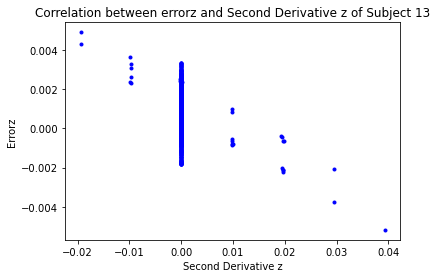

[[ 1.         -0.21687613]
 [-0.21687613  1.        ]]


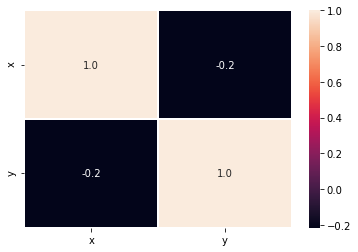

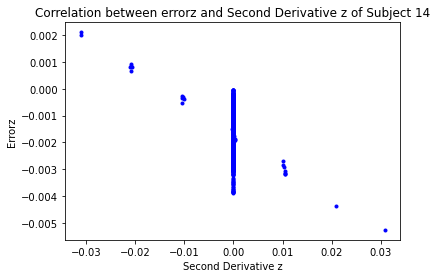

[[ 1.         -0.24524129]
 [-0.24524129  1.        ]]


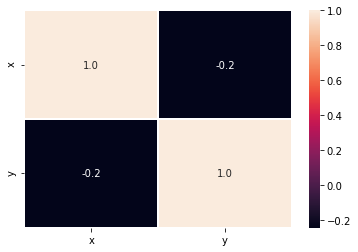

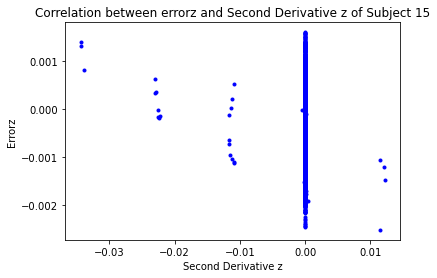

[[ 1.         -0.06381031]
 [-0.06381031  1.        ]]


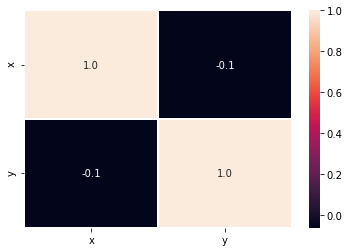

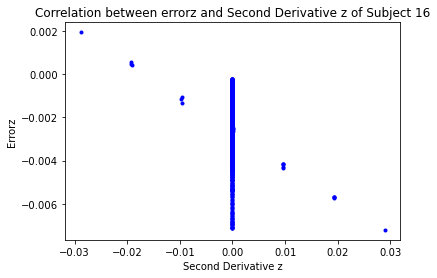

[[ 1.         -0.19091792]
 [-0.19091792  1.        ]]


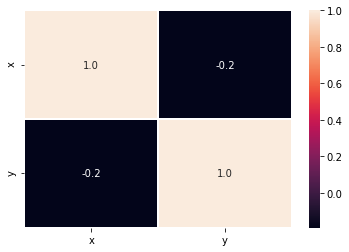

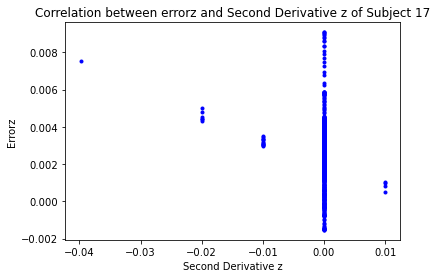

[[ 1.         -0.14564425]
 [-0.14564425  1.        ]]


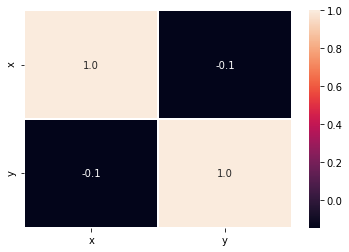

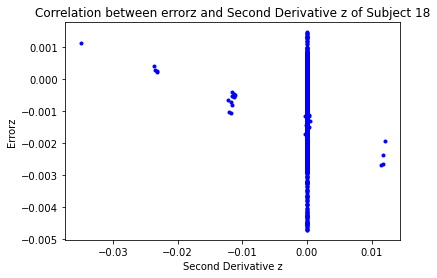

[[ 1.         -0.07683715]
 [-0.07683715  1.        ]]


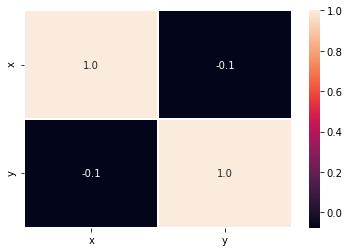

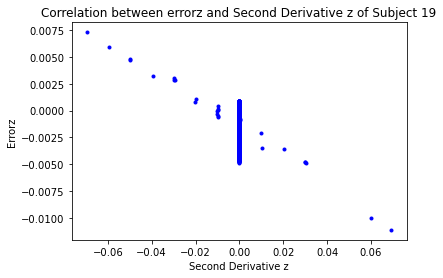

[[ 1.         -0.38344286]
 [-0.38344286  1.        ]]


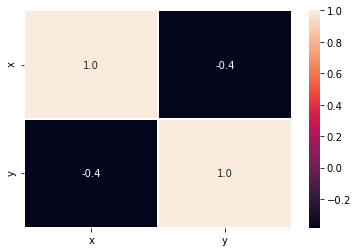

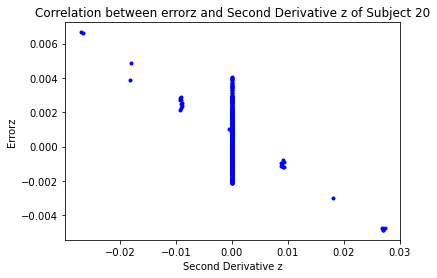

[[ 1.         -0.30352403]
 [-0.30352403  1.        ]]


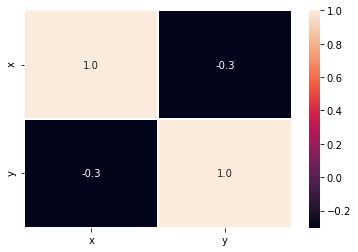

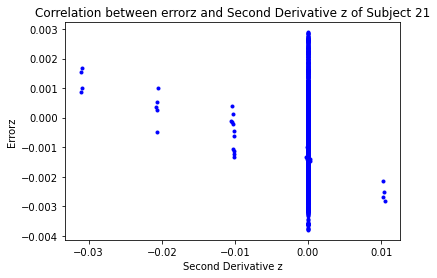

[[ 1.         -0.07257444]
 [-0.07257444  1.        ]]


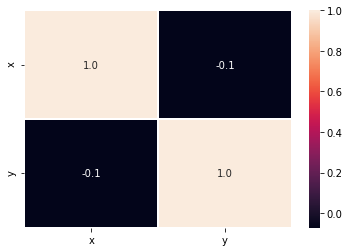

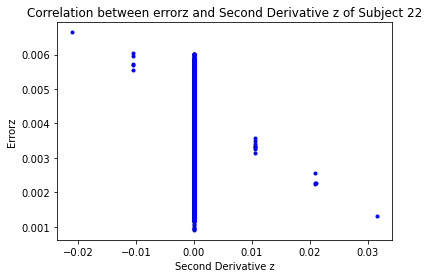

[[ 1.         -0.07711146]
 [-0.07711146  1.        ]]


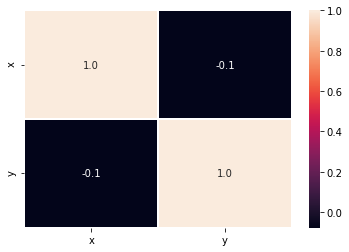

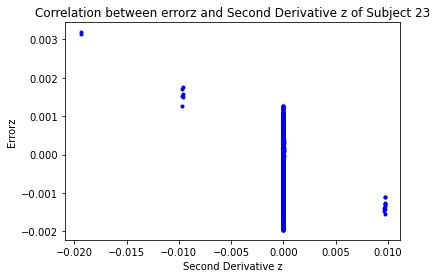

[[ 1.         -0.18965687]
 [-0.18965687  1.        ]]


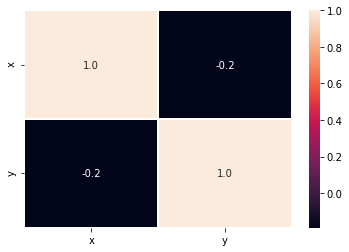

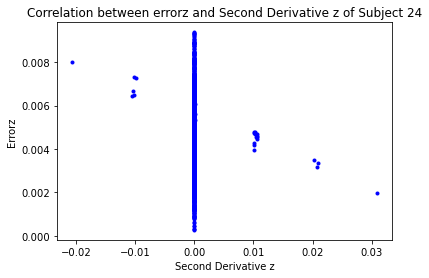

[[ 1.         -0.05928375]
 [-0.05928375  1.        ]]


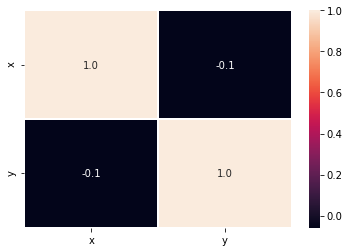

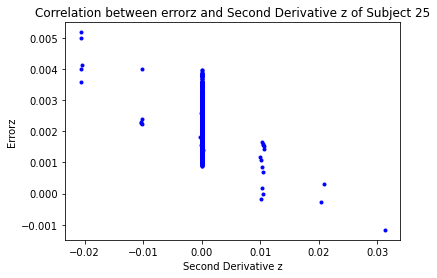

[[ 1.         -0.21172368]
 [-0.21172368  1.        ]]


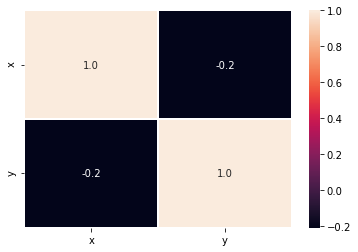

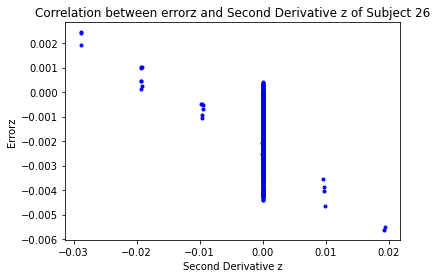

[[ 1.         -0.24793899]
 [-0.24793899  1.        ]]


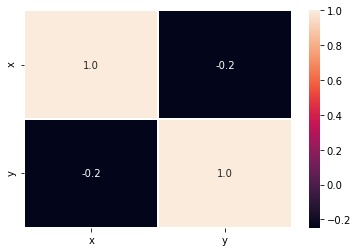

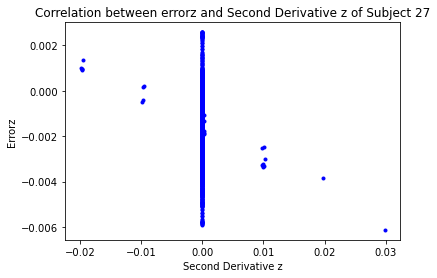

[[ 1.         -0.11963627]
 [-0.11963627  1.        ]]


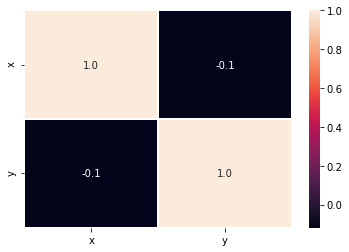

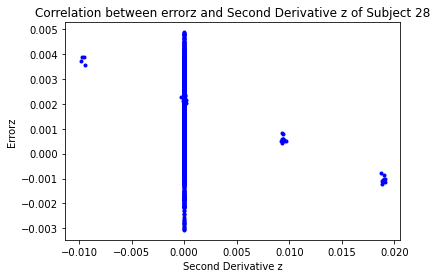

[[ 1.         -0.09005772]
 [-0.09005772  1.        ]]


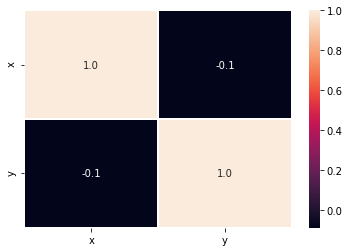

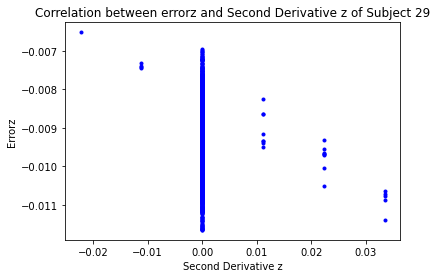

[[ 1.         -0.08018004]
 [-0.08018004  1.        ]]


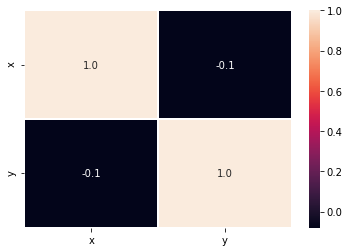

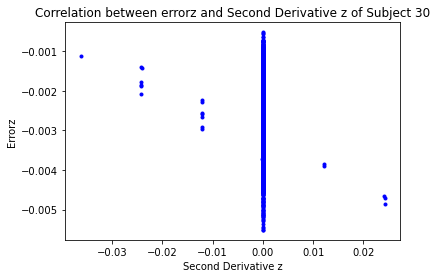

[[ 1.         -0.09165696]
 [-0.09165696  1.        ]]


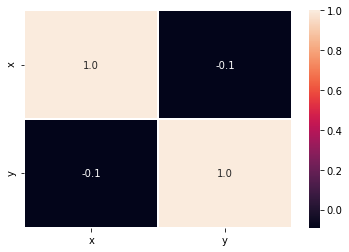

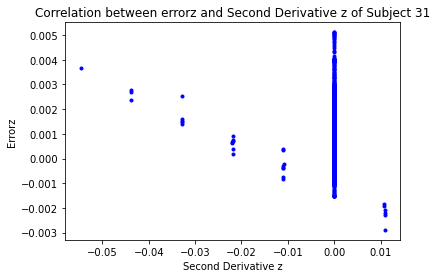

[[ 1.         -0.06150264]
 [-0.06150264  1.        ]]


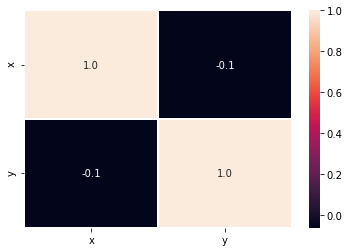

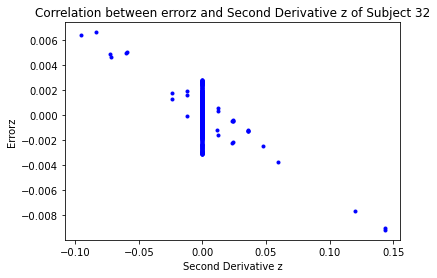

[[ 1.         -0.37590749]
 [-0.37590749  1.        ]]


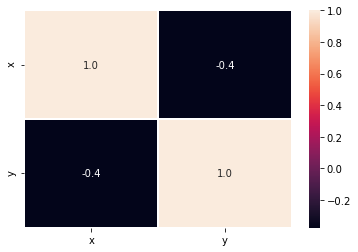

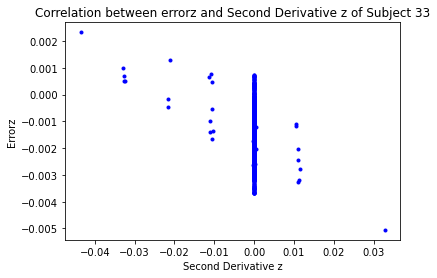

[[ 1.         -0.16887052]
 [-0.16887052  1.        ]]


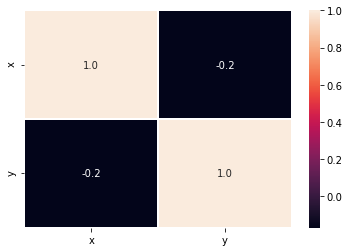

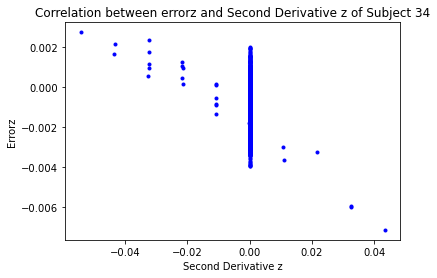

[[ 1.         -0.18632433]
 [-0.18632433  1.        ]]


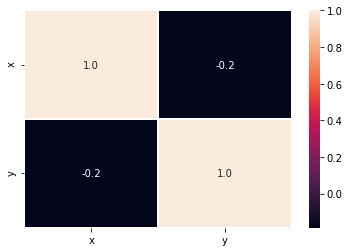

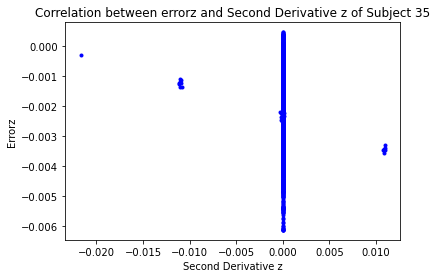

[[ 1.         -0.06881592]
 [-0.06881592  1.        ]]


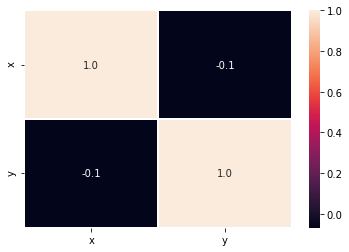

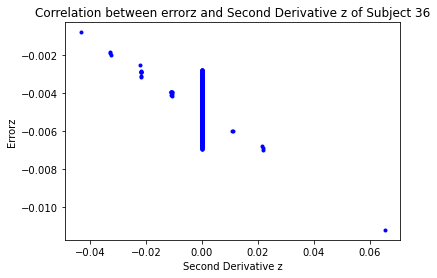

[[ 1.         -0.22780183]
 [-0.22780183  1.        ]]


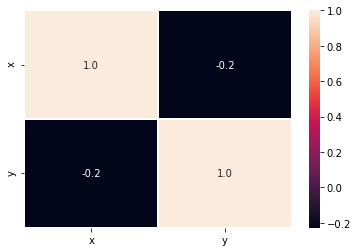

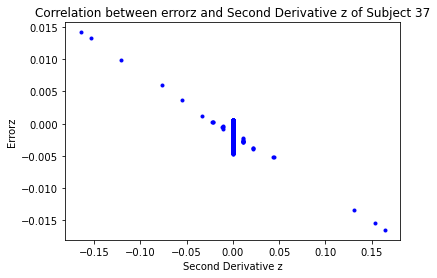

[[ 1.         -0.48540704]
 [-0.48540704  1.        ]]


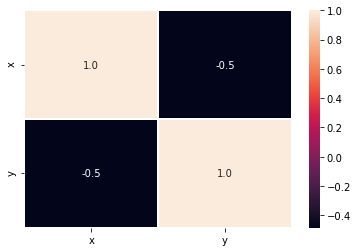

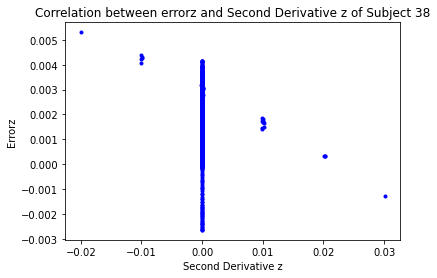

[[ 1.         -0.10802227]
 [-0.10802227  1.        ]]


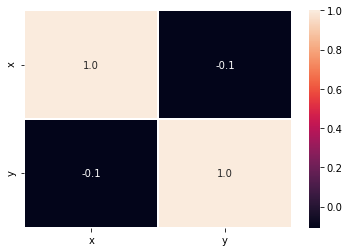

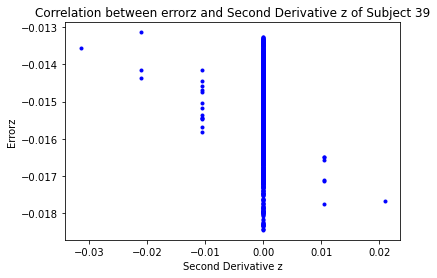

[[ 1.        -0.0828969]
 [-0.0828969  1.       ]]


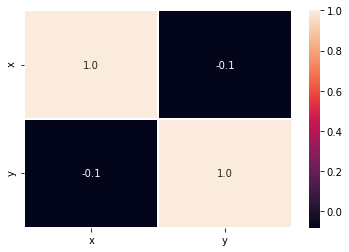

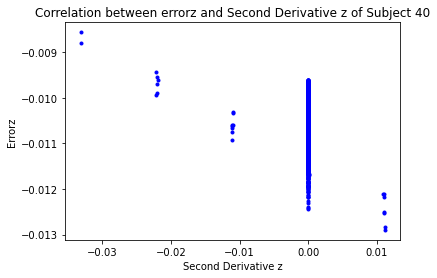

[[ 1.         -0.15654001]
 [-0.15654001  1.        ]]


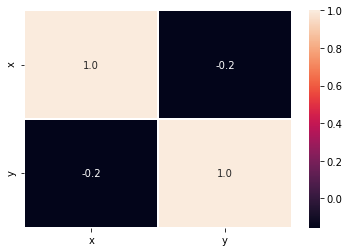

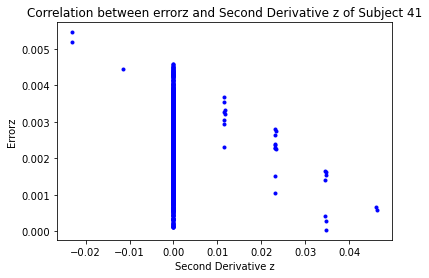

[[ 1.         -0.08878942]
 [-0.08878942  1.        ]]


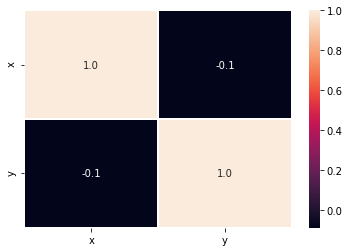

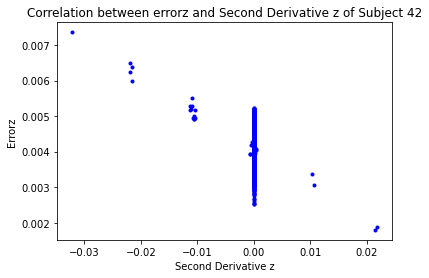

[[ 1.         -0.26614169]
 [-0.26614169  1.        ]]


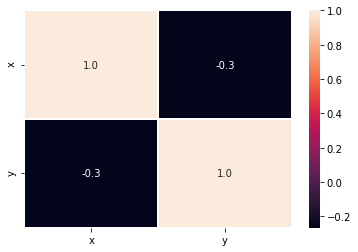

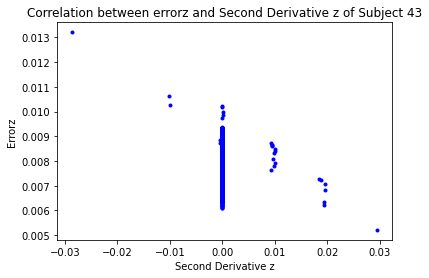

[[ 1.         -0.10000327]
 [-0.10000327  1.        ]]


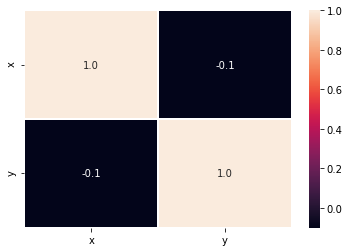

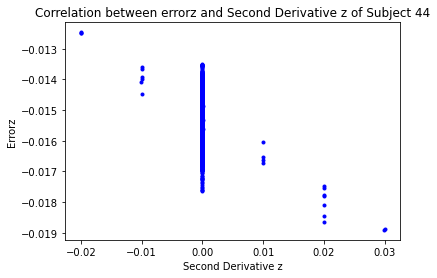

[[ 1.         -0.24901962]
 [-0.24901962  1.        ]]


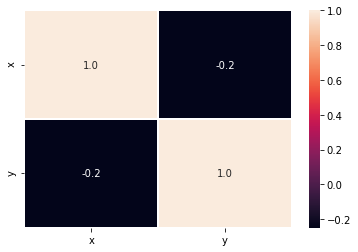

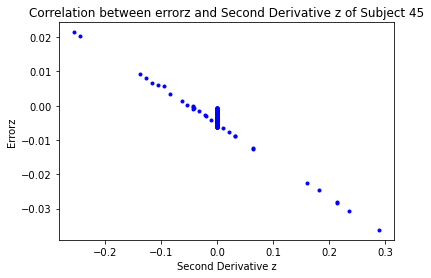

[[ 1.         -0.86745102]
 [-0.86745102  1.        ]]


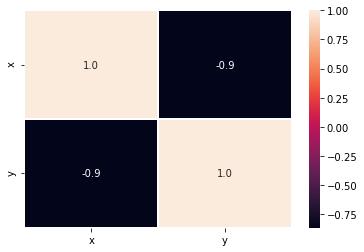

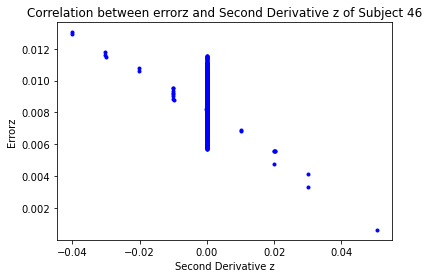

[[ 1.         -0.22142359]
 [-0.22142359  1.        ]]


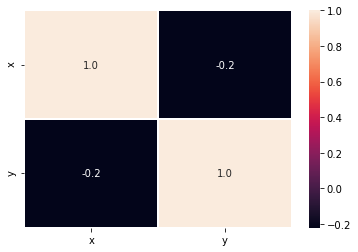

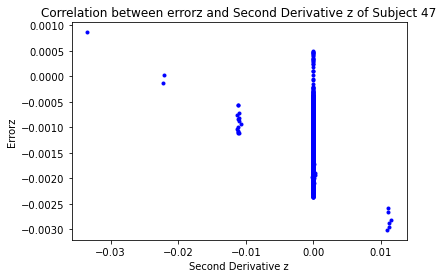

[[ 1.         -0.16762527]
 [-0.16762527  1.        ]]


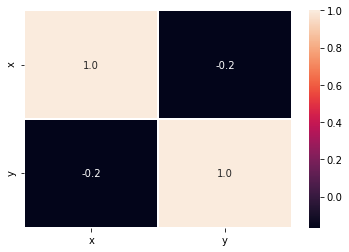

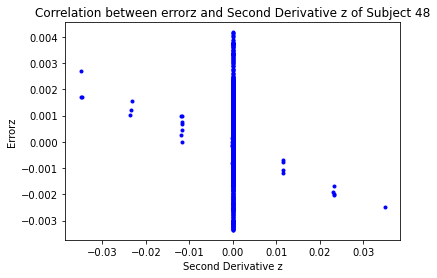

[[ 1.         -0.10169965]
 [-0.10169965  1.        ]]


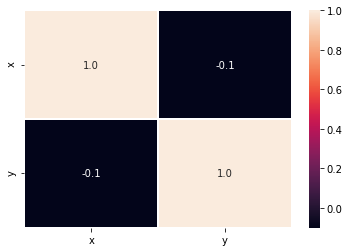

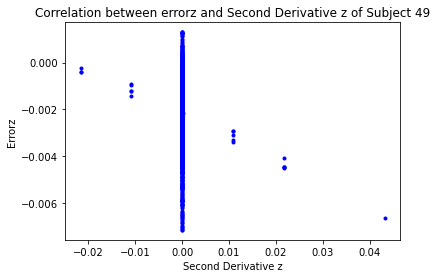

[[ 1.         -0.11238164]
 [-0.11238164  1.        ]]


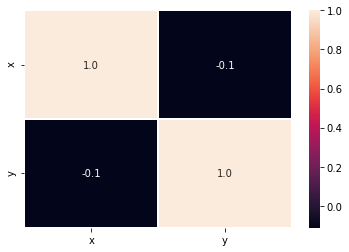

In [10]:
import pandas as pd 
import seaborn as sns
for s in range (1,50):
    a=PDSinfo[PDSinfo['Subject']==s].index.tolist()[2]
    fname_grf = os.path.join(path2, PDSinfo.Trial[a] + 'grf' + '.txt') 
    fname_mkr = os.path.join(path2, PDSinfo.Trial[a] + 'mkr' + '.txt')
    grf = pd.read_csv(fname_grf, delimiter='\t', header=0, engine='c')
    mkr = pd.read_csv(fname_mkr, delimiter='\t', header=0, engine='c')
    COGX=mkr['COG_X']
    COGY=mkr['COG_Y']
    COGZ=mkr['COG_Z']
    d=(COGX**2+COGY**2+COGZ**2)**0.5
    angulox = np.arcsin(COGX/d)
    anguloz= np.arcsin(COGZ/d)
    matrizangx=np.array(angulox[30:])
    matrizangz=np.array(anguloz[30:])
    t=grf['Time']
    dt=t[1]-t[0]
    d1x=np.zeros(len(matrizangx))
    d1z=np.zeros(len(matrizangz))
    for i in range(0, len(matrizangx)-1):
        next=i+1
        d1x[i]=(matrizangx[next]-matrizangx[i])/dt
        d1z[i]=(matrizangz[next]-matrizangz[i])/dt
    d2x=np.zeros(len(d1x))
    d2z=np.zeros(len(d1z))
    for i in range(0, 30):
        next=i+1
        d2x[i]=(d1x[next]-d1x[i])/dt
        d2z[i]=(d1z[next]-d1z[i])/dt
    COPX=COGX[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2x
    COPZ=COGZ[30:]-(4/3)*(d[30:]**4)*(1/9.8)*d2z
    COPXreal=grf['COPNET_X']
    COPZreal=grf['COPNET_Z']
    COPXmatrix=np.array(COPX)
    COPXrealmatrix=np.array(COPXreal[30:])
    COPZmatrix=np.array(COPZ)
    COPZrealmatrix=np.array(COPZreal[30:])
    errorx=np.subtract(COPXmatrix,COPXrealmatrix)
    errorz=np.subtract(COPZmatrix,COPZrealmatrix)
    data={'x':d2z,
         'y': errorz
         }
    df=pd.DataFrame(data)
    plt.plot('x','y','bo',data= df, marker='.')
    plt.xlabel("Second Derivative z")
    plt.ylabel("Errorz")
    plt.title("Correlation between errorz and Second Derivative z of Subject {}".format(s))
    plt.show()
    r=np.corrcoef(d2z,errorz)
    print(r)
    plt.figure()
    data={'x':d2z,
          'y': errorz
         }
    df=pd.DataFrame(data)
    correlation=df.corr()
    plot=sns.heatmap(correlation,annot= True, fmt='.1f',linewidths=.6)
    plt.show()